<div class="alert alert-block alert-info">

## <center> GROUP PROJECT - TO GRANT OR NOT TO GRANT: DECIDING ON COMPENSATION BENEFITS </center> <br>
#  <center> <b> XGBOOST </center> <br>
## <center> Fall Semester 2024-2025 <center>
<br>
<center> Group 46: <center> <br>
<center>Afonso Ascensão, 20240684 <br><center>
<center>Duarte Marques, 20240522 <br><center>
<center>Joana Esteves, 20240746 <br><center>
<center>Rita Serra, 20240515 <br><center>
<center>Rodrigo Luís, 20240742 <br><center>

<div>

**Description of contents:**
- Explore the data and detect missing values, outliers, duplicates and incongruencies. 
- Analyze descriptive statistics, to further explore the data.
- Visual exploration to complement the analysis, performed for univariate, bivariate and multivariate analysis. 
- Focus on finding connections between the features and the target.

**Table of Contents**
- [1. Import the needed Libraries](#importlibraries)
- [2. Import Dataset](#importdataset)
- [3. Metadata](#metadata)
- [4. Exploring the Data](#section_4)
- [5. Missing Values](#section_5)
- [6. Duplicates](#section_6)
- [7. Descriptive Statistics](#section_7)
    - [7.1. Numeric Features](#section_7_1)
    - [7.2. Categorical Features](#section_7_2)
    - [7.3. Further Exploring Strange Values](#section_7_3)
- [8. Visual Exploration](#section_8)
    - [8.1. Univariate Analysis - Numerical Variables](#section_8_1)
    - [8.2. Univariate Analysis - Categorical Variables](#section_8_2)
    - [8.3. Bivariate Analysis - Numerical / Numerical](#section_8_3)
    - [8.4. Bivariate Analysis - Categorical / Categorical](#section_8_4)
    - [8.5. Multivariate Analysis](#section_8_5)


<a class="anchor" id="importlibraries">

# 1. Import the needed Libraries

</a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil
from scipy.stats import chi2_contingency

<a class="anchor" id="importdataset">

# 2. Import Dataset

</a>

In [2]:
train_data = pd.read_csv('project_data/train_data.csv', sep = ',')
test_data = pd.read_csv('project_data/test_data.csv', sep = ',')
pd.set_option("display.max_columns", None)

C:\Users\rcouc\AppData\Local\Temp\ipykernel_22844\1054157282.py:1: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv('project_data/train_data.csv', sep = ',')


In [3]:
# Find the column names that exist in the training data but don't exist in the test data

missing_cols = [col for col in train_data.columns if col not in test_data.columns]
missing_cols

['Claim Injury Type', 'Agreement Reached', 'WCB Decision']

In [4]:
train_data = train_data.drop(columns=["WCB Decision"])

**Columns that don't exist on the test data have to be predicted:**
- MAIN target variable: Claim Injury Type.
- Binary variable: Agreement Reached.
- Categorical variable: WCB Decision.

The remaining columns are our features.

<a class="anchor" id="metadata">
    
# 3. Metadata
    
</a>


- Accident Data - Injury date of the claim
- Age at injury - Age of the injured worker when the injury occurred
- Alternative Dispute Resolution - Adjudication processes external to the board
- Assembly Date - The date
- Attorney/Representative - Is the claim being represented by an Attorney?
- Average Weekly Wage - The wage used to calculate workers’ compensation, disability, or an Paid Leave wage replacement benefits.
- Birth Year - The reported year of birth of the injured worker.
- C-2 Date - Date of receipt of the Employer's Report of Work-Related Injury/Illness or equivalent (formerly Form C-2).
- C-3 Date - Date Form C-3 (Employee Claim Form) was received.
- Carrier Name - Name of primary insurance provider responsible for providing workers’ compensation coverage to the injured worker’s employer.
- Carrier Type - Type of primary insurance provider responsible for providing workers’ compensation coverage.
- Claim Identifier - Unique identifier for each claim, assigned by WCB.
- County of Injury - Name of the New York County where the injury occurred.
- COVID-19 Indicator - Indication that the claim may be associated with COVID-19.
- District Name - Name of the WCB district office that oversees claims for that region or area of the state.
- First Hearing Date - Date the first hearing was held on a claim at a WCB hearing location. A blank date means the claim has not yet had a hearing held.
- Gender - The reported gender of the injured worker.
- IME-4 Count - Number of IME-4 forms received per claim. The IME-4 form is the “Independent Examiner's Report of Independent Medical Examination” form.
- Industry Code - NAICS code and descriptions are available at: https://www.naics.com/search-naics-codes-by-industry/.
- Industry Code Description - 2-digit NAICS industry code description used to classify businesses according to their economic activity.
- Medical Fee Region - Approximate region where the injured worker would receive medical service.
- OIICS Nature of Injury Description - The OIICS nature of injury codes & descriptions are available at https://www.bls.gov/iif/oiics_manual_2007.pdf.
- WCIO Cause of Injury Code - The WCIO cause of injury codes & descriptions are at https://www.wcio.org/Active%20PNC/WCIO_Cause_Table.pdf
- WCIO Cause of Injury Description - See description of field above.
- WCIO Nature of Injury Code - The WCIO nature of injury are available at https://www.wcio.org/Active%20PNC/WCIO_Nature_Table.pdf
- WCIO Nature of Injury Description - See description of field above.
- WCIO Part Of Body Code - The WCIO part of body codes & descriptions are available at https://www.wcio.org/Active%20PNC/WCIO_Part_Table.pdf
- WCIO Part Of Body Description - See description of field above.
- Zip Code - The reported ZIP code of the injured worker’s home address.
- Agreement Reached - **Binary variable**: Yes if there is an agreement without the involvement of the WCB -> **unknown** at the start of a claim.
- WCB Decision - **Multiclass variable**: Decision of the WCB relative to the claim: “Accident” means that claim refers to workplace accident, “Occupational Disease” means illness from the workplace. -> **requires WCB deliberation** so it is unknown at start of claim.
- Claim Injury Type - **Main target variable**: Deliberation of the WCB relative to benefits awarded to the claim. **Numbering indicates severity**

<a class="anchor" id="chapter4">

# 4. Exploring the Data

</a>

In [5]:
# Keep a copy of the original training data
train_data_original = train_data.copy()

In [6]:
# Displays the first rows of the DataFrame to check if the data was loaded correctly
train_data.head()

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Identifier,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,Number of Dependents
0,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,5393875,2. NON-COMP,ST. LAWRENCE,N,SYRACUSE,NaN,M,NaN,44.0,RETAIL TRADE,I,NaN,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,1.0
1,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,1A. PRIVATE,5393091,4. TEMPORARY,WYOMING,N,ROCHESTER,2020-02-21,F,4.0,23.0,CONSTRUCTION,I,NaN,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,4.0
2,2019-12-06,40.0,N,2020-01-01,N,1434.80,1979.0,2020-01-01,NaN,INDEMNITY INSURANCE CO OF,1A. PRIVATE,5393889,4. TEMPORARY,ORANGE,N,ALBANY,NaN,M,NaN,56.0,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,II,NaN,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,0.0,6.0
3,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,957648180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-12-30,61.0,N,2020-01-01,N,NaN,1958.0,2019-12-31,NaN,STATE INSURANCE FUND,2A. SIF,5393887,2. NON-COMP,DUTCHESS,N,ALBANY,NaN,M,NaN,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,II,NaN,16.0,"HAND TOOL, UTENSIL; NOT POWERED",43.0,PUNCTURE,36.0,FINGER(S),12603,0.0,1.0


In [7]:
# Displays the last rows of the DataFrame to check if the last row contains a summary of the all columns.
# It's important to ensure that there isn't an entry that represents the sum of values
train_data.tail()

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Identifier,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,Number of Dependents
593466,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,327160035,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
593467,2022-12-13,72.0,N,2022-12-31,N,0.0,1950.0,2022-12-31,NaN,TECHNOLOGY INSURANCE CO. INC.,1A. PRIVATE,6165075,2. NON-COMP,SULLIVAN,N,BINGHAMTON,NaN,F,NaN,48.0,TRANSPORTATION AND WAREHOUSING,I,NaN,25.0,FROM DIFFERENT LEVEL (ELEVATION),90.0,MULTIPLE PHYSICAL INJURIES ONLY,-9.0,MULTIPLE,12779,0.0,3.0
593468,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,249875936,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
593469,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120584215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
593470,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,818961390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Looking at the head and tail of the data set, we can see something interesting:
- The "Claim Identifier"s with more than 7 digits (in particular these have 9 digits) have no information except for the "Assembly Date". Analyze it further.

In [8]:
# Select all lines with a 9 digit clain identifier
nine_digit_id = train_data.loc[train_data["Claim Identifier"] > 10_000_000]

nine_digit_id.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Accident Date,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age at Injury,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alternative Dispute Resolution,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Assembly Date,19445,1096,2020-06-16,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Attorney/Representative,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Average Weekly Wage,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Birth Year,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C-2 Date,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C-3 Date,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Carrier Name,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
train_data = train_data.drop(nine_digit_id.index)

In [10]:
# Get the dimensions (number of rows and columns) of the original train_data DataFrame
train_data_original.shape

(593471, 32)

In [11]:
train_data.shape

(574026, 32)

In [12]:
train_data.columns

Index(['Accident Date', 'Age at Injury', 'Alternative Dispute Resolution',
       'Assembly Date', 'Attorney/Representative', 'Average Weekly Wage',
       'Birth Year', 'C-2 Date', 'C-3 Date', 'Carrier Name', 'Carrier Type',
       'Claim Identifier', 'Claim Injury Type', 'County of Injury',
       'COVID-19 Indicator', 'District Name', 'First Hearing Date', 'Gender',
       'IME-4 Count', 'Industry Code', 'Industry Code Description',
       'Medical Fee Region', 'OIICS Nature of Injury Description',
       'WCIO Cause of Injury Code', 'WCIO Cause of Injury Description',
       'WCIO Nature of Injury Code', 'WCIO Nature of Injury Description',
       'WCIO Part Of Body Code', 'WCIO Part Of Body Description', 'Zip Code',
       'Agreement Reached', 'Number of Dependents'],
      dtype='object')

In [13]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 574026 entries, 0 to 593467
Data columns (total 32 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       570337 non-null  object 
 1   Age at Injury                       574026 non-null  float64
 2   Alternative Dispute Resolution      574026 non-null  object 
 3   Assembly Date                       574026 non-null  object 
 4   Attorney/Representative             574026 non-null  object 
 5   Average Weekly Wage                 545375 non-null  float64
 6   Birth Year                          544948 non-null  float64
 7   C-2 Date                            559466 non-null  object 
 8   C-3 Date                            187245 non-null  object 
 9   Carrier Name                        574026 non-null  object 
 10  Carrier Type                        574026 non-null  object 
 11  Claim Identifier               

**Initial Analysis**

- The dataset consists of 574026 entries across 29 columns, after removing line w/ 9 digit claim id.
- The column "WCB Decision" was removed since it does not exist in our test data.
- "OIICS Nature of Injury Description" will be removed since it has no values in it (0 variance).
- Since "Claim Identifier" is an unique code, we can use it as our index.
- **Data Type** Issues:
    - Variables related to codes should be changed to strings - although these are numerical values, they do not behave as such and they represent categorical information.
    - "Agreement Reached" is a float, should be a boolean (it represents a binary value).
    - "Birth Year" is a float, should be an int. May be used to create new variable: current age.
    - "Number of Dependents" is a float, should be an int.
    - "Age at Injury" - consider it as a float because it has decimal points for the months? Analyze it further.
    - "Alternative Dispute Resolution", "Attorney/Representative" and "COVID-19 Indicator" (in theory) should only have boolean values representing them. Analyze it further.

<a class="anchor" id="section_5">

# 5. Missing Values

</a>

In [14]:
def show_missing(train):
    variables = []
    dtypes = []
    count = []
    unique = []
    missing = []
    pc_missing = []

    for item in train.columns:
        variables.append(item)
        dtypes.append(train[item].dtype)
        count.append(len(train[item]))
        unique.append(len(train[item].unique()))
        missing.append(train[item].isna().sum())
        pc_missing.append(round((train[item].isna().sum() / len(train[item])) * 100, 2))  # Multiply by 100 after dividing

    output = pd.DataFrame({
        'variable': variables,
        'dtype': dtypes,
        'count': count,
        'unique': unique,
        'missing': missing,
        'pc_missing': pc_missing
    })

    return output

In [15]:
var_description = show_missing(train_data)
var_description

,variable,dtype,count,unique,missing,pc_missing
0,Accident Date,object,574026,5540,3689,0.64
1,Age at Injury,float64,574026,108,0,0.00
2,Alternative Dispute Resolution,object,574026,3,0,0.00
3,Assembly Date,object,574026,897,0,0.00
4,Attorney/Representative,object,574026,2,0,0.00
5,Average Weekly Wage,float64,574026,120025,28651,4.99
6,Birth Year,float64,574026,108,29078,5.07
7,C-2 Date,object,574026,2476,14560,2.54
8,C-3 Date,object,574026,1649,386781,67.38
9,Carrier Name,object,574026,2046,0,0.00


- Variables w/ **missing values**:
    - "Accident Date": low value.
    - "Average Weekly Wage": 4.99% missing values, wage may be unkown for this cases.
    - "Birth Year": 5.07%, birth year may be unkown for this cases.
    - "C-2 Date": 2.54%, there may be cases where this form does not need to be delivered. (Blank indicates no form received)
    - "C-3 Date": 67.38%, there may be cases where this form does not need to be delivered. (Blank indicates no form received)
    - "First Hearing Date": 73,73%, there may be cases where having a hearing is not necessary. (A blank date means the claim has not yet had a hearing held)
    - "IME-4 Count": 76.86%, since this a form w/ an independent examiner's report it may not apply to all cases.
    - "Industry Code": 1.73%, it may be unkonwn for this cases. (Blank means it was not reported)
    - "Industry Code Description": Same as industry code. (Blank means it was not reported)
    - All "WCIO..." codes and repective descriptions: 2.72% - 2.98%, this codes may not apply to all cases. (Blank means it does not apply to this claim); also, the columns share the same values of missing values (Cause of Injury Code with Cause of Injury Description, for example) which might indicate they have the exact same information, just shown in a different way.
    - "Zip Code": 4.99%, the location of the worker may be unknown in this cases.

<a class="anchor" id="section_6">

# 6. Duplicates

</a>

In [16]:
# Check for duplicated claims
print(train_data.duplicated().sum())

0


In [17]:
train_data[train_data.duplicated(keep=False)]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Identifier,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,Number of Dependents


There are no duplicated rows

<a class="anchor" id="section_7">

# 7. Descriptive Statistics
</a>

<a class="anchor" id="section_7_1">

## 7.1. Numeric Features

</a>

In [18]:
# For numeric features
metric_features = ["Age at Injury", "Average Weekly Wage", "Birth Year", "IME-4 Count", "Number of Dependents"]
train_data[metric_features].describe().T

,count,mean,std,min,25%,50%,75%,max
Age at Injury,574026.0,42.114270,14.256432,0.0,31.0,42.0,54.0,117.0
Average Weekly Wage,545375.0,491.088321,6092.918120,0.0,0.0,0.0,841.0,2828079.0
Birth Year,544948.0,1886.767604,414.644423,0.0,1965.0,1977.0,1989.0,2018.0
IME-4 Count,132803.0,3.207337,2.832303,1.0,1.0,2.0,4.0,73.0
Number of Dependents,574026.0,3.006559,2.000801,0.0,1.0,3.0,5.0,6.0


- Age at Injury: The min value is 0, this could mean the age for this instances is unkonw. The max value is 117, this value most likely does not represent a true instance, and might by a data entry error.
- Average Weekly Wage: The min value is 0, this could represent cases where the wage is unknown or an error. There is a high variability for this variable in this dataset caused by extreme outliers (wage higher than 2 Million per week).
- Birth Year: The min value is 0, this could represent cases where the birth year is unkown or an error. (Blank means data was not provided.)
- IME-4 Count: The max value is 73, it does not seem reasonable someone would deliver 73 medical reports, it might be an error.

### Important:
Despite being numerical variables, all the variables identified as "codes" are to be address as categorical features.

<a class="anchor" id="section_7_2">

## 7.2. Categorical Features

</a>

In [19]:
# For non-numeric features
categorical = ['Accident Date', 'Alternative Dispute Resolution',
       'Assembly Date', 'Attorney/Representative', 'C-2 Date', 'C-3 Date', 'Carrier Name', 'Carrier Type',
       'County of Injury', 'COVID-19 Indicator', 'District Name', 'First Hearing Date', 'Gender',
       'Industry Code', 'Industry Code Description',
       'Medical Fee Region', 'OIICS Nature of Injury Description',
       'WCIO Cause of Injury Code', 'WCIO Cause of Injury Description',
       'WCIO Nature of Injury Code', 'WCIO Nature of Injury Description',
       'WCIO Part Of Body Code', 'WCIO Part Of Body Description',
       'Agreement Reached']
train_data[categorical].describe(include="object").T

,count,unique,top,freq
Accident Date,570337,5539,2020-03-01,1245
Alternative Dispute Resolution,574026,3,N,571412
Assembly Date,574026,897,2020-03-06,1413
Attorney/Representative,574026,2,N,392291
C-2 Date,559466,2475,2021-05-11,1847
C-3 Date,187245,1648,2021-04-21,350
Carrier Name,574026,2046,STATE INSURANCE FUND,111144
Carrier Type,574026,8,1A. PRIVATE,285368
County of Injury,574026,63,SUFFOLK,60430
COVID-19 Indicator,574026,2,N,546505


- Alternative Dispute Resolution: The vast majority of the observations did not reach an alternative resolution
- Attorney/Representative: The majority did not have an attorney or representative.
- Carrier Type: The majority of carriers are private.
- Claim Injury Type: Most claims were not compensated (NON-COMP).
- Covid-19 Indicator: The vast majority of claims are not covid related.
- Distric Name: Most of the claims were analyzed by the NYC office, which corresponds to the region of the claim.
- Gender: The majority of individuals are male.



<a class="anchor" id="section_7_3">

## 7.3. Further Exploring Strange Values

</a>

In [20]:
train_data["Age at Injury"].unique()

array([ 31.,  46.,  40.,  61.,  67.,  48.,  33.,  55.,  20.,  21.,  51.,
        62.,  35.,  54.,  32.,  34.,  38.,  30.,  36.,  39.,  44.,  56.,
        29.,  60.,  49.,  50.,  18.,  58.,  24.,  45.,  53.,  52.,  47.,
        25.,  23.,  22.,  64.,  70.,  41.,  69.,  57.,  27.,  42.,  77.,
        72.,  19.,  28.,  63.,  65.,  59.,  43.,  26.,  74.,  66.,  76.,
        68.,  37.,   0.,  16.,  71.,  82.,  75.,  17.,  78.,  73.,  89.,
        85.,  84.,  81.,  87.,  80.,  11.,  88.,  79.,  15.,  83.,  86.,
        90.,   1.,  10., 102.,  94., 117.,  14., 113.,  95.,  92., 104.,
         5.,   8., 115., 110.,  91.,  96.,  99.,  12.,  13.,  93., 101.,
         7., 111.,   9.,  97., 112., 109., 100.,  98., 114.])

In [21]:
print("Alternative Dispute Resolution, unique values: ", train_data["Alternative Dispute Resolution"].unique())
print("Attorney/Representative, unique values: ", train_data["Attorney/Representative"].unique())
print("COVID-19 Indicator, unique values: ", train_data["COVID-19 Indicator"].unique())
print("Gender, unique values: ", train_data["Gender"].unique())

Alternative Dispute Resolution, unique values:  ['N' 'Y' 'U']
Attorney/Representative, unique values:  ['N' 'Y']
COVID-19 Indicator, unique values:  ['N' 'Y']
Gender, unique values:  ['M' 'F' 'U' 'X']


**Incorrect data types:**
- As we mentioned before, "Attorney/Representative" and "COVID-19 Indicator" are binary variables, that only return Y(es) or N(o)."Alternative Dispute Resolution" returns 'U' but that might represent the value "unknown".
- Regarding "Age at Injury": there are no float values, as such this should be changed to an int.

In [22]:
train_data["Claim Injury Type"].value_counts(normalize=True)

Claim Injury Type
2. NON-COMP        0.507082
4. TEMPORARY       0.258711
3. MED ONLY        0.120040
5. PPD SCH LOSS    0.084108
1. CANCELLED       0.021736
6. PPD NSL         0.007336
8. DEATH           0.000819
7. PTD             0.000169
Name: proportion, dtype: float64

- Our main target variable has 8 different types of values and the data seems to be inbalanced (we will need to stratify the data)

In [23]:
train_data["Average Weekly Wage"].value_counts(normalize=True)

Average Weekly Wage
0.00       0.615081
250.00     0.005855
600.00     0.004252
1765.00    0.002373
500.00     0.002318
             ...   
1409.93    0.000002
1483.02    0.000002
1885.51    0.000002
2676.03    0.000002
1008.86    0.000002
Name: proportion, Length: 120024, dtype: float64

- We can see that more than 61% of the observations for "Average Weekly Wage" are equal to 0, if this corresponds to unkown salaries we should take into consideration the very large percentage.

In [24]:
# Check if there are assembly dates earlier than accident dates
len(train_data[train_data['Assembly Date'] < train_data['Accident Date']])

1407

We have 1407 lines where assembly dates is earlier than accident dates, it is not possible for this to represent a true circumstance.

<a class="anchor" id="section_8">

# 8. Visual Exploration

</a>

<a class="anchor" id="section_8_1">

## 8.1. Univariate Analysis - Numerical variables

</a>

In [25]:
def number_bins_sturges(data):
    '''
    Calculates the number of bins based on the number of data points, using Sturges' rule
    Sturges' rule: k = log2(n) + 1

    Requires: The dataset for which the number of bins is to be calculated.
    Ensures:
        - The returned value is a positive integer representing the number of bins.
        - The number of bins increases logarithmically as the dataset size increases.
    '''

    n = len(data)
    bins = np.ceil(np.log2(n) + 1) # np.log2 computes the base-2 logarithm of n, and np.ceil rounds the result up to the next whole number.
    return int(bins)

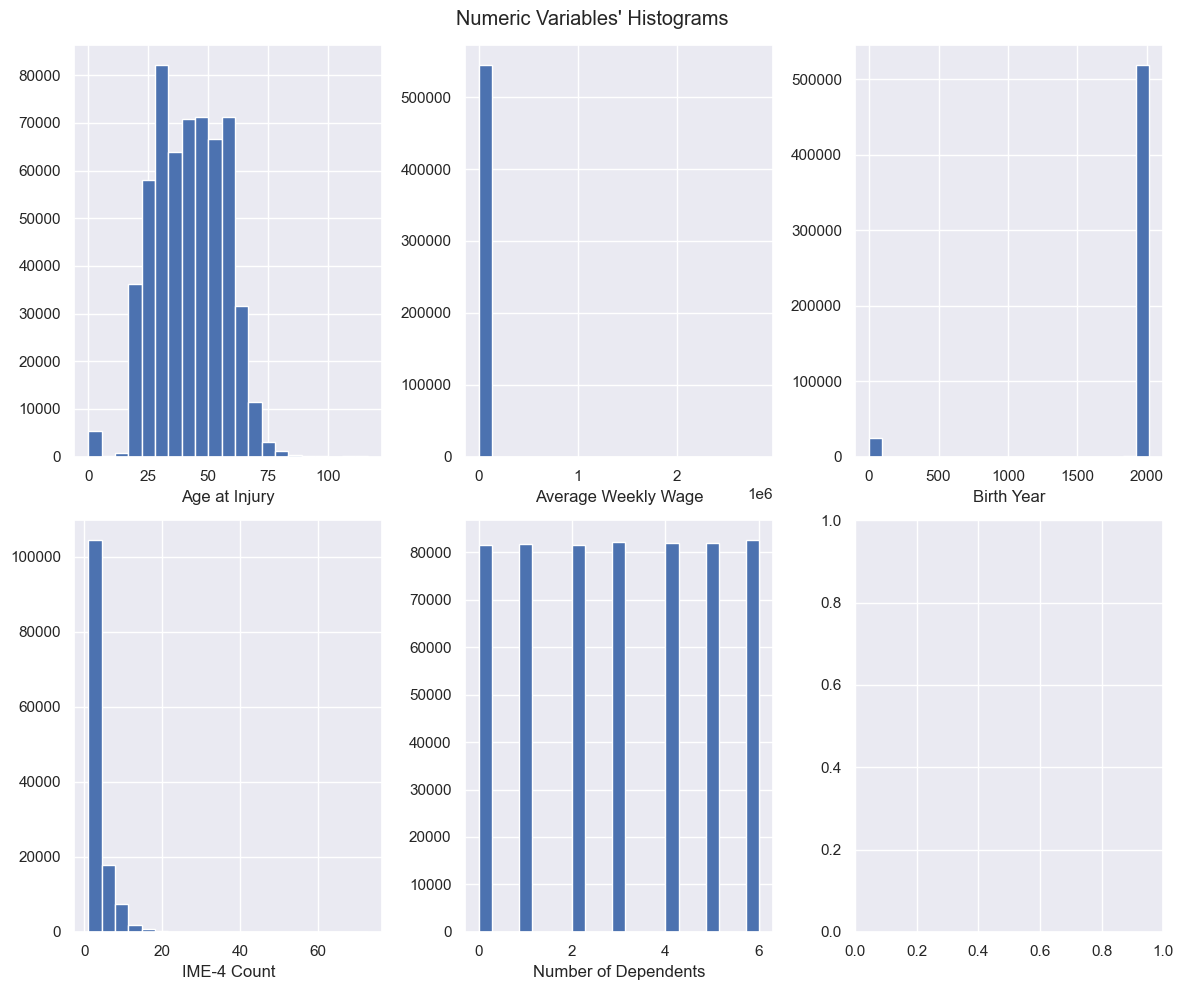

In [27]:
# Plot ALL Numeric Variables' Histograms in one figure

sns.set() # Reset to darkgrid

sp_rows = ceil(len(metric_features) / 3)
sp_cols = 3

fig, axes = plt.subplots(sp_rows,
                         sp_cols,
                         figsize=(12,10),
                        tight_layout=True)


for ax, feat in zip(axes.flatten(), metric_features):
    bins_numb= number_bins_sturges(train_data[feat])
    ax.hist(train_data[feat], bins=bins_numb)
    ax.set_title(feat, y=-0.13)

title = "Numeric Variables' Histograms"

plt.suptitle(title)
plt.show()

**Age at Injury**: The distribution is approximately asymmetric to the right, with a peak between 20 and 40 years old, indicating that the majority of accidents occur at younger ages.
The right tail suggests a gradual decrease in accidents as age increases, but there are still some occurrences at older ages.

**Birth Year and Average Weekly Wage**: The distribution suggests input errors or invalid data.

**IME-4 Count**: The distribution is asymmetric to the right, with most observations concentrated at low values ​​(close to zero) and some higher occurrences.
This pattern indicates that most people have had few IME-4 assessments, with a small number of people having had many.
An exponential distribution or a long-tailed distribution could fit this data well.

**Number of Dependents**: It suggests an approximately uniform distribution, indicating that there is no number of dependents that is more common than others within the observed range.
It's an unusual distribution for social data, which may raise questions about the data collection or its nature.

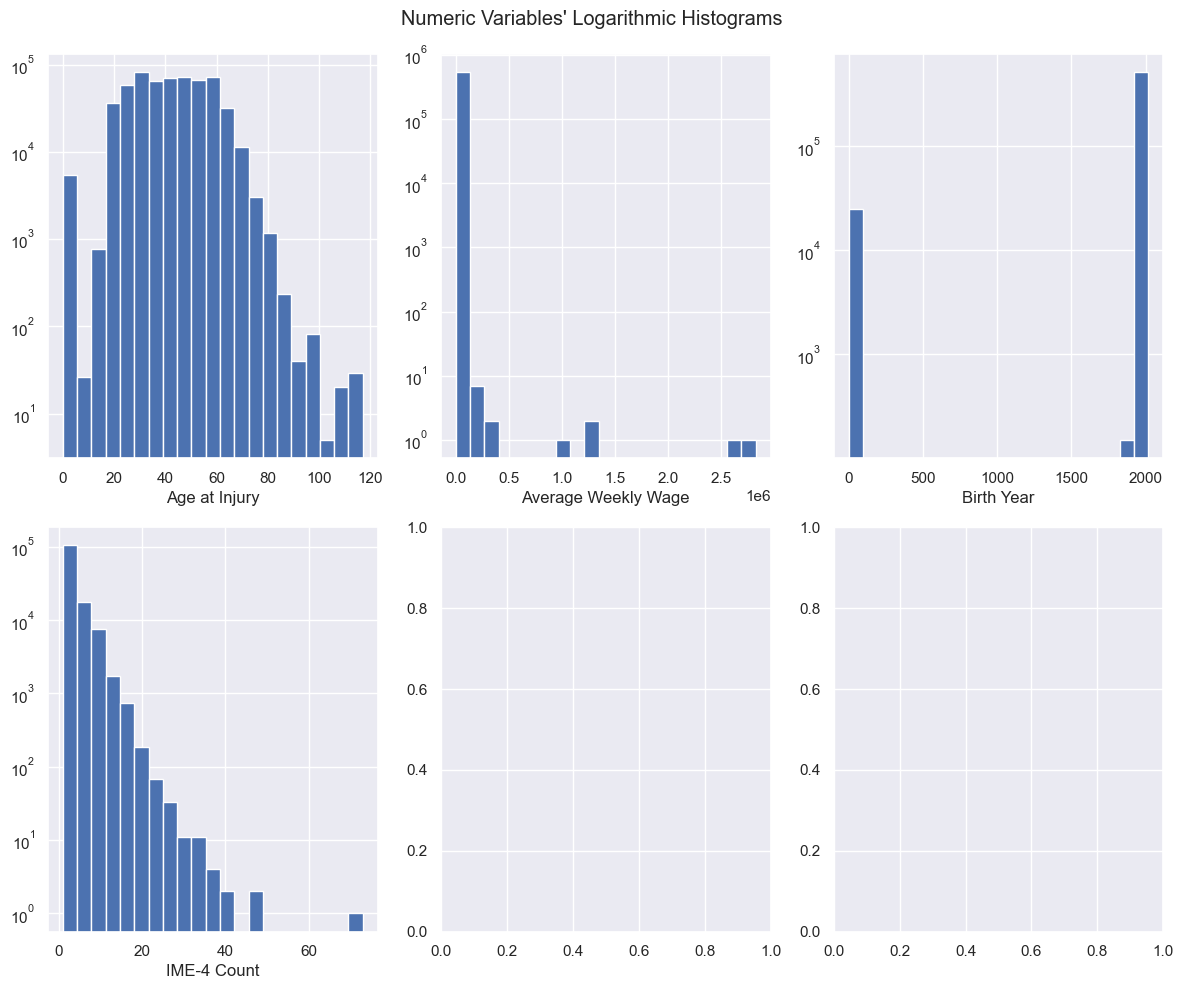

In [28]:
# Plot Numeric Variables'Logarithmic Histograms in one figure
sns.set()
filtered_metric_features = [feat for feat in metric_features if feat != 'Number of Dependents']

sp_rows = ceil(len(filtered_metric_features) / 3)
sp_cols = 3

fig, axes = plt.subplots(sp_rows,
                         sp_cols,
                         figsize=(12, 10),
                         tight_layout=True)


for ax, feat in zip(axes.flatten(), filtered_metric_features):
    bins_numb = number_bins_sturges(train_data[feat])
    ax.hist(train_data[feat], bins=bins_numb)
    ax.set_title(feat, y=-0.13)
    ax.set_yscale("log")


title = "Numeric Variables' Logarithmic Histograms"
plt.suptitle(title)
plt.show()

- All variables have a high frequency of zeros.
- **Age at Injury:** Even with the zeros we can still see most instances fall between 20 and 50, and soon the frequency drops the higher the values. We also have some 100+ instances, which may represent errors.
- **IME-4 Count:** Overall the higher the values the less frequent they are.
- **Avererage Weekly Wage:** In both histograms (original and logarithmic) we can see that the extreme values have a high impact on the distribution of the data. We will need to fill the values for 0 (considering the zeros as unknown/missing data), and treat the extreme outliers.
- **Birth year:** Because of the zeros we cannot accuratly see the distribution, so we have to remove the zeros to plot the histogram(we belive the zeros are unknown cases).

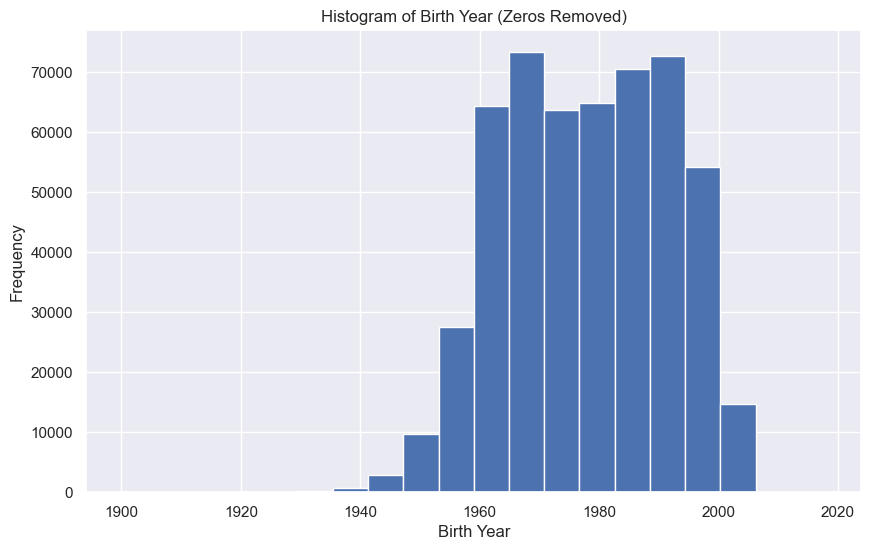

In [29]:
sns.set()
feature_nozero = 'Birth Year'

plt.figure(figsize=(10, 6))

data_cleaned = train_data[train_data[feature_nozero] > 0][feature_nozero] # Remove zeros

bins_numb = number_bins_sturges(data_cleaned)

plt.hist(data_cleaned, bins=bins_numb)
plt.title(f'Histogram of {feature_nozero} (Zeros Removed)')
plt.xlabel(feature_nozero)
plt.ylabel('Frequency')

# Show the plot
plt.show()

- **Birth year:** After removing the zeros we can see the distribution for the known birth years. Most values fall between 1960 and 1990.

It will be necessary to check how does this variable correlate with "Age at Injury" since they seem to convey similar information, just presented differently.

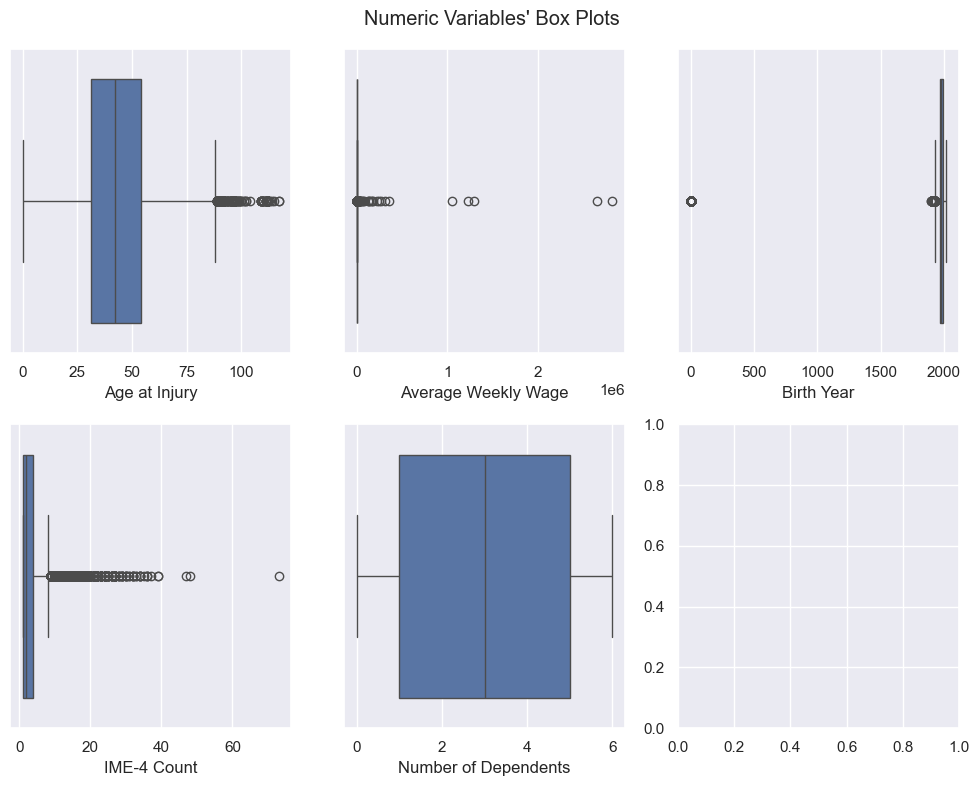

In [30]:

sns.set()
sp_rows = 2
sp_cols = ceil(len(metric_features) / sp_rows)

fig, axes = plt.subplots(sp_rows,
                         sp_cols,
                         figsize=(10, 8),
                         tight_layout=True
                        )


for ax, feat in zip(axes.flatten(), metric_features):
    sns.boxplot(x=train_data[feat], ax=ax)


title = "Numeric Variables' Box Plots"

plt.suptitle(title)

plt.show()

**Age at Injurity** : The distribution is slightly asymmetrical, with the majority of ages concentrated between 20 and 60 years old. However, there are significant outliers aged over 80, indicating rare occurrences of accidents in older people.
This asymmetry suggests that most injuries occur in younger individuals, but there are a small number of extreme cases in older ages.

**Average Weekly Wage**: This graph presents a marked asymmetry, with the majority of weekly wages concentrated in low values ​​and some extremely high values ​​(above 1.5 million).
These outliers indicate a minority with exceptional weekly wages, which skews the distribution and creates a long tail.

**Birth Year**: It is not possible to gain insights from this boxplot, since the incoherent values distort the data.

**IME-4 Count**: The asymmetry is evident, with most counts close to zero, but with some cases with very high counts (up to around 70).
These outliers show that for the majority, counts are low, but there is a minority who have undergone a high number of IME-4 assessments, indicating unusual situations or cases that required more intense follow-up.

**Number of Dependents**: The median number of dependents is around 3, with most people having between 1 and 5 dependents.
There are no extreme values ​​here, indicating a more even distribution for the number of dependents.

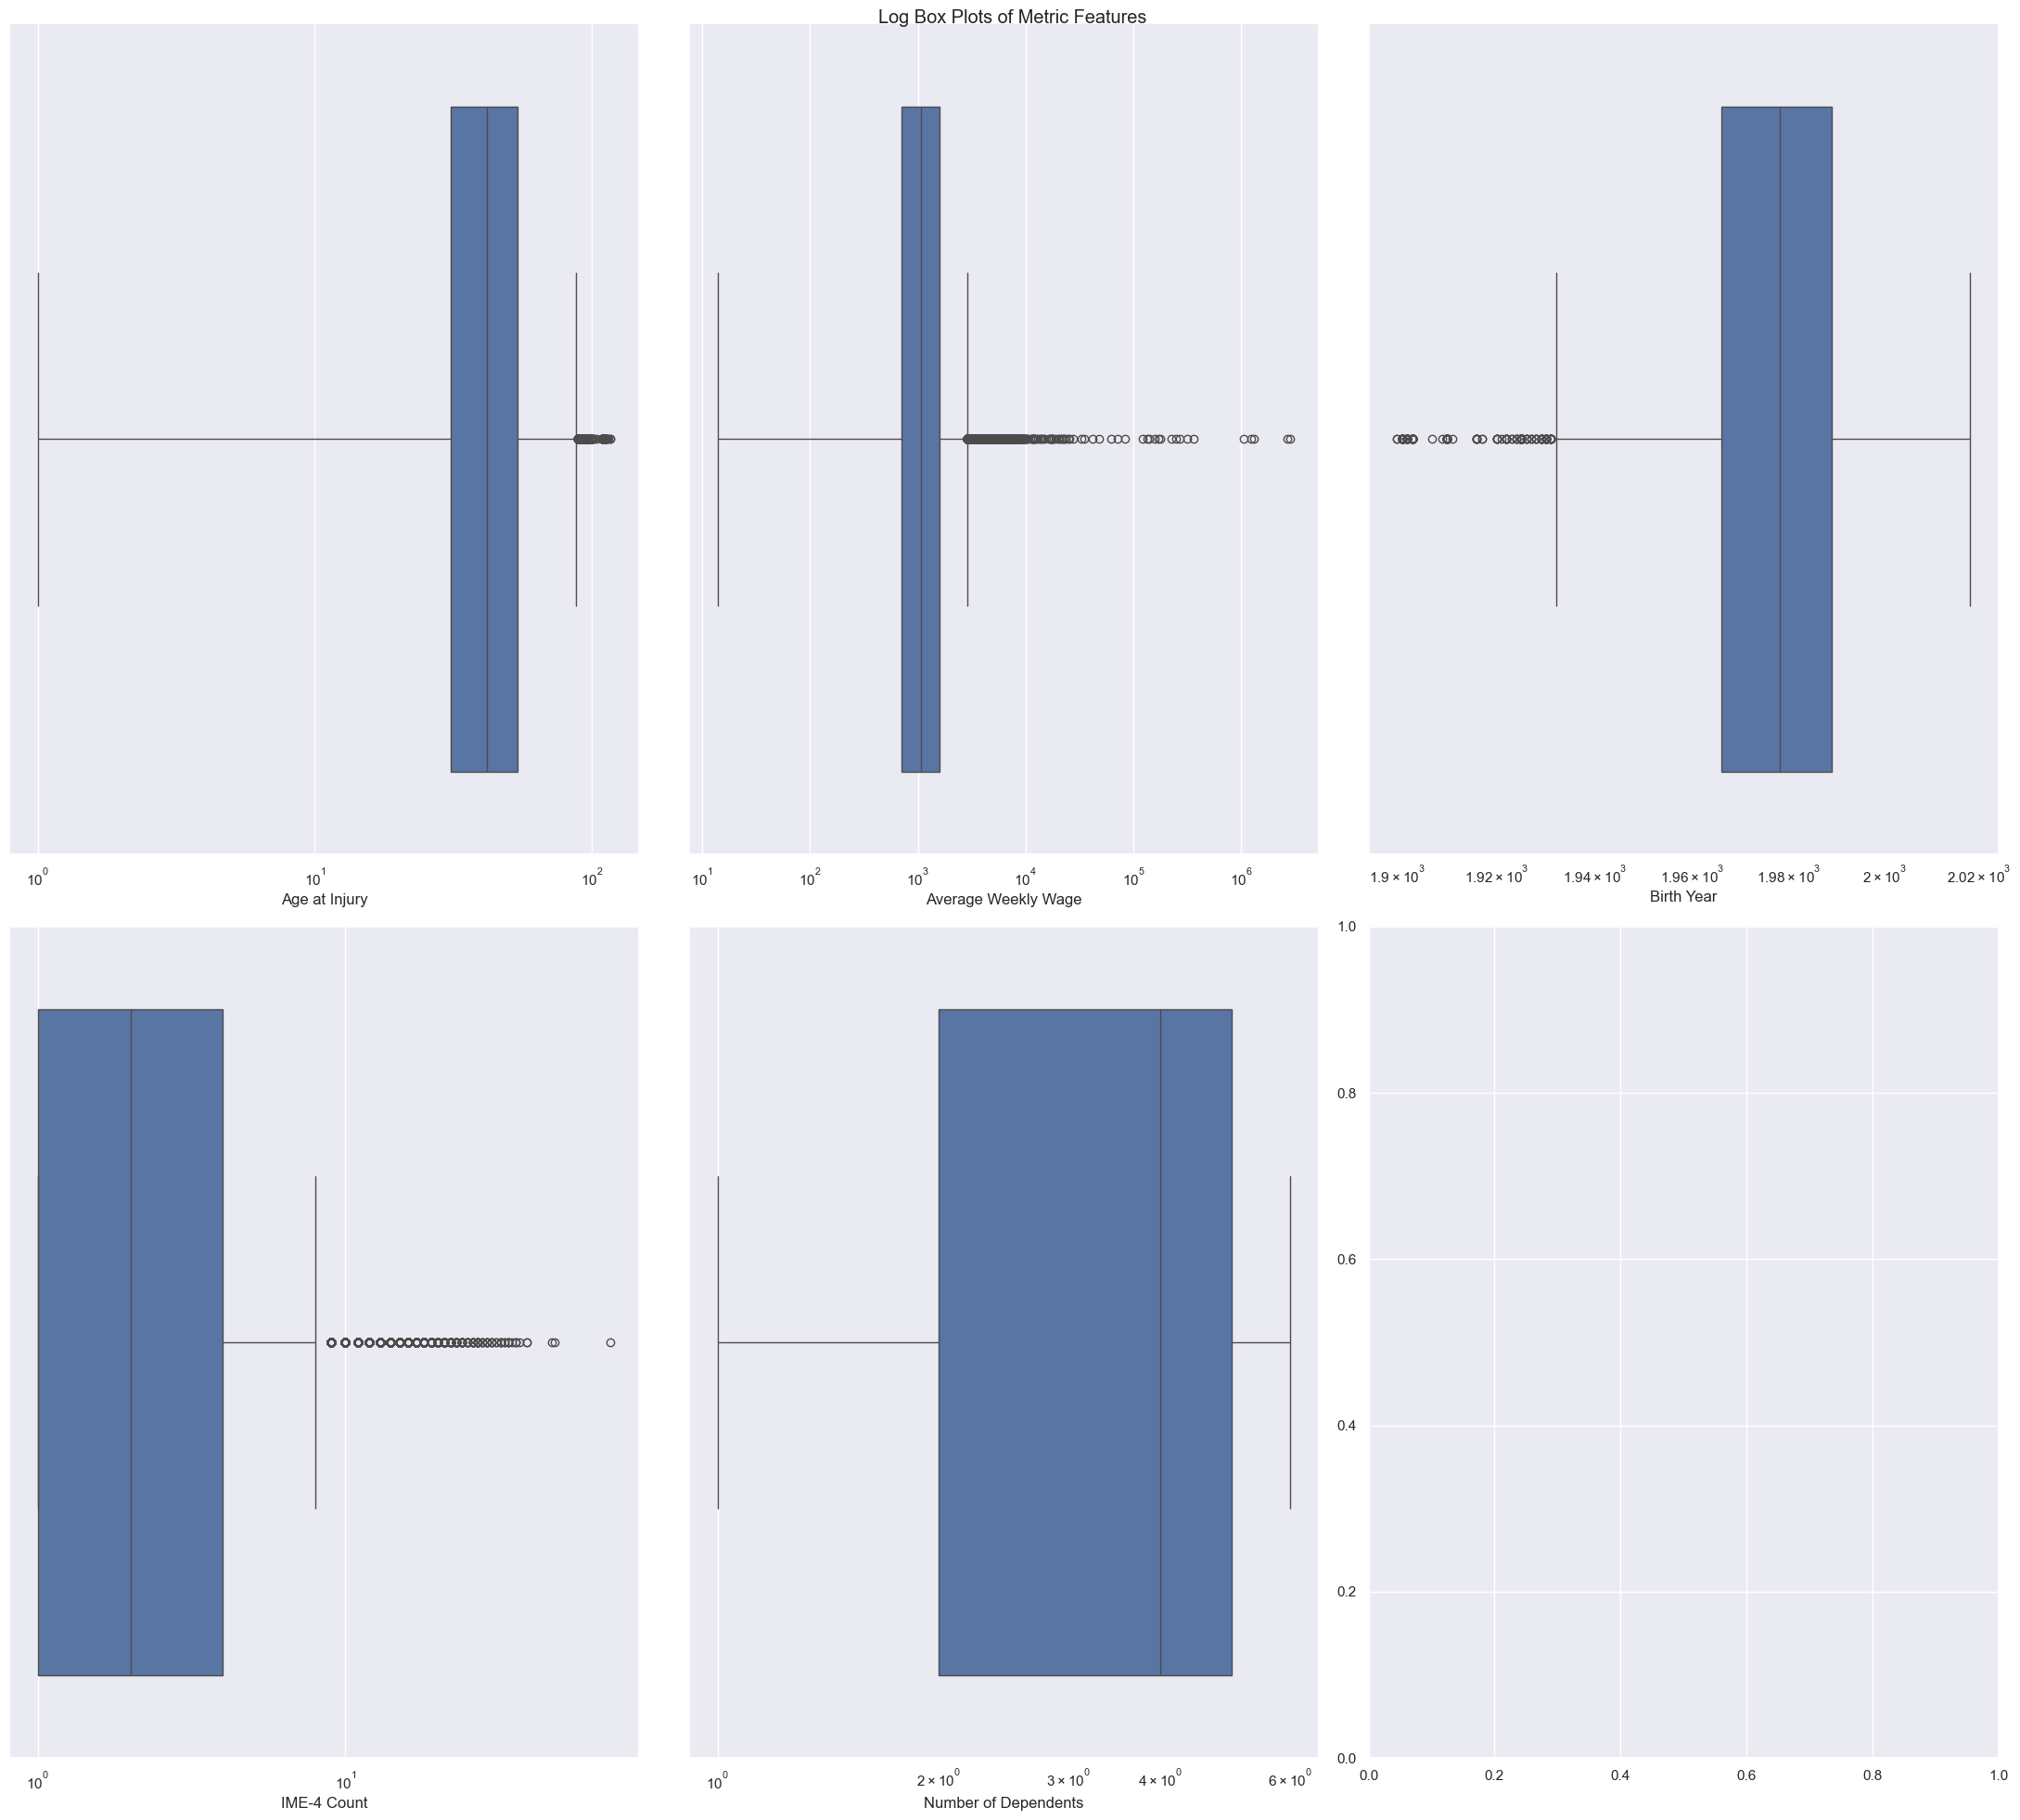

In [31]:
# Loop through each feature in metric_features
fig, axes = plt.subplots(nrows=2, ncols=ceil(len(metric_features) / 2), figsize=(22, 20), tight_layout=True)

for ax, feature in zip(axes.flatten(), metric_features):
    data_cleaned = train_data[feature].replace(0, np.nan)

    sns.boxplot(x=data_cleaned.dropna(), ax=ax)

    ax.set_xscale("log")


plt.suptitle("Log Box Plots of Metric Features")

plt.show()


**Outliers summary:**
- **Age at Injury**: For individuals aged 80+, those observations are considered outliers. The WCB includes actors/actresses and that might be an explanation for the higher values in age, however, after a certain treshold, those values are no longer realistic and as such they'll have to be limited in a future step. 
- **Average Weekly Wage**: The boxplots confirm what we had seen in the histograms: a high prevalence of zeros and very extreme outliers makes it impossible to correctly assess the data. The 0 will have to be filled with some kind of imputing and the outliers, limited.
- **Birth Year**: Birth years earlier than around 1935 are outliers.
- **IME-4 Count**: The outliers have to be further analyzed because they seem related to the high frequency of zeros, however this is not as straightforward as some of the other cases: having a 0 in this variable might just be a normal occurrence, the form does not apply to the case. Still, values above 40 seem distant from other values.


For the outliers we will consider two commonly used methods: IQR and Winsorization.

<a class="anchor" id="section_8_2">

## 8.2. Univariate Analysis - Categorical variables

</a>

In [32]:
non_metric_features= train_data.columns.drop(metric_features).to_list()


In [33]:
some_non_metric_features= ['Alternative Dispute Resolution', 'Attorney/Representative','Carrier Type',
                            'Claim Injury Type','COVID-19 Indicator','District Name','Gender','Medical Fee Region', 'Agreement Reached']

print(some_non_metric_features)

['Alternative Dispute Resolution', 'Attorney/Representative', 'Carrier Type', 'Claim Injury Type', 'COVID-19 Indicator', 'District Name', 'Gender', 'Medical Fee Region', 'Agreement Reached']


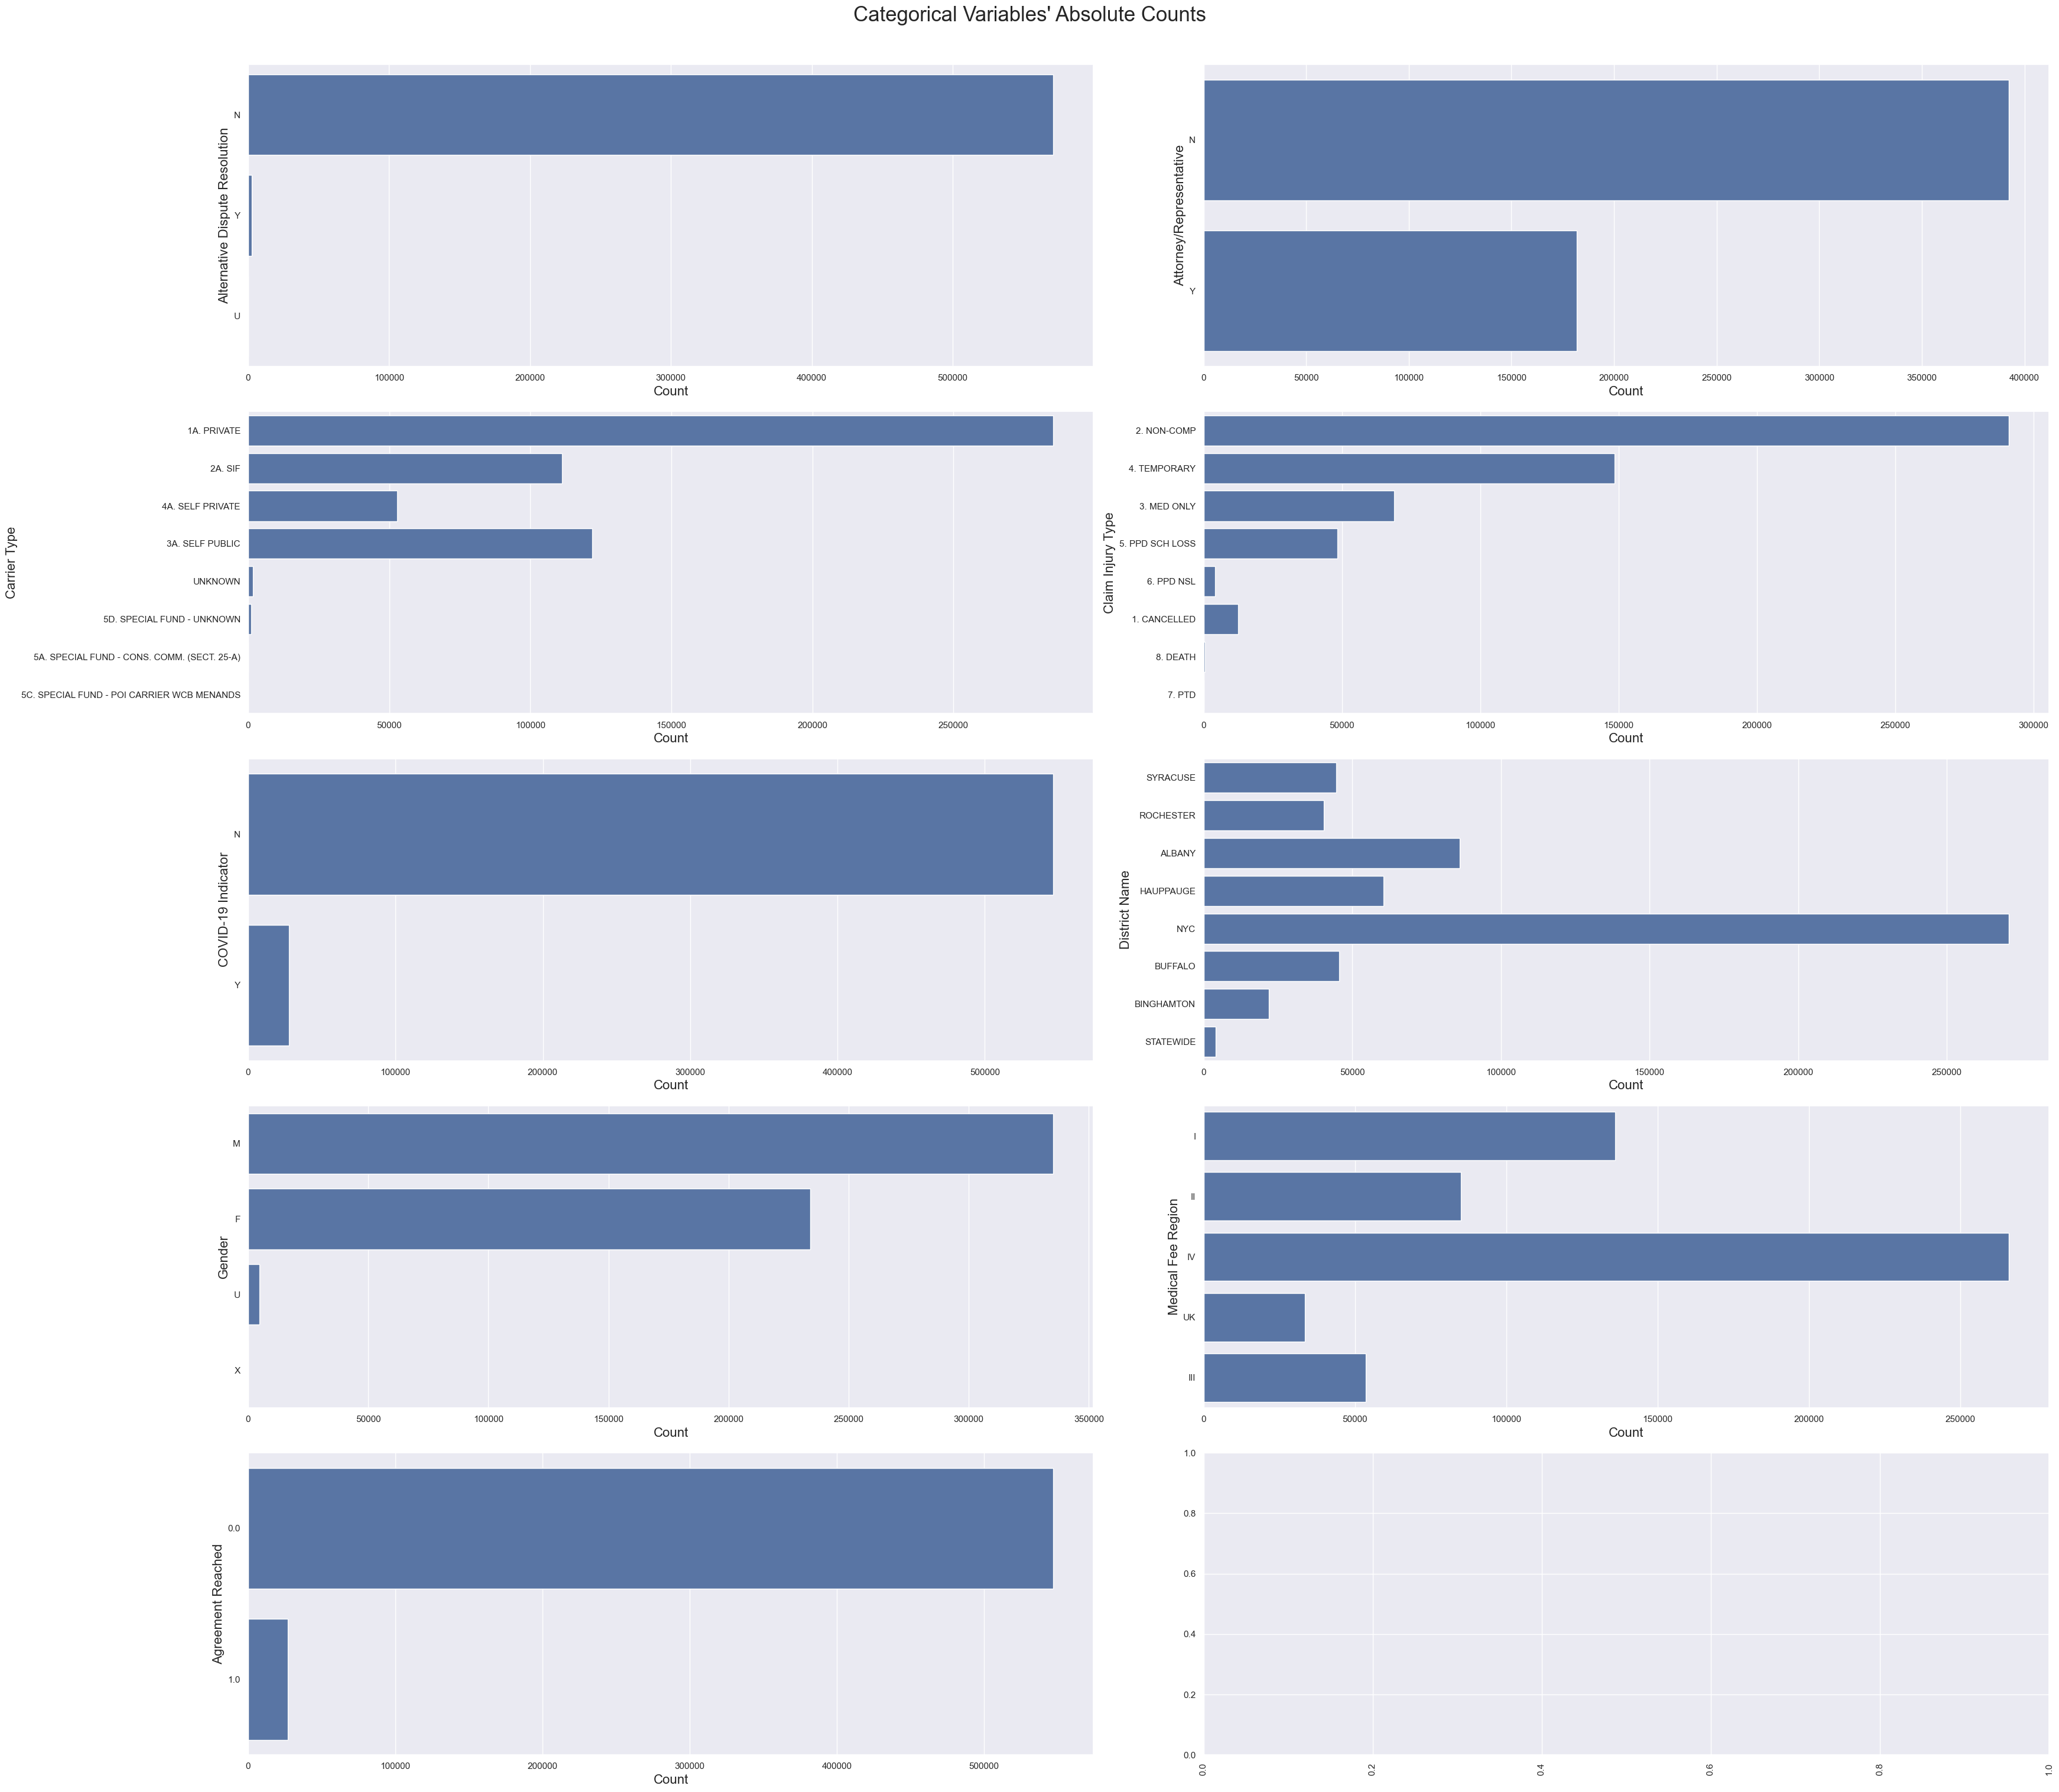

In [34]:
sns.set()

fig, axes = plt.subplots(5,2, figsize=(35, 30), tight_layout=True)

for ax, feat in zip(axes.flatten(), some_non_metric_features):

    sns.countplot(y=train_data[feat], ax=ax)
    ax.set_xlabel('Count', fontsize=16)
    ax.set_ylabel(feat, fontsize=16)

title = "Categorical Variables' Absolute Counts"
plt.suptitle(title, fontsize=25, y= 1.01)

plt.xticks(rotation=90)
plt.show()


**Alternative Dispute Resolution**: As seen in the statistics chapter, the vast majority of cases do not have an alternative dispute resolution.

**Carrier Type**: Types "1A - PRIVATE", "3A - SELF PUBLIC" have an higher prevalence than all the others

**COVID-19 Indicator**: Most cases are not related with COVID-19

**Gender**: Most of the observations are Male, closely followed by Female. Apart from that, there are a few "Unknown" cases and almost zero "X" (Non-binary)

**Attorney/ Representative**: Most of the claims do not have a legal representative assisting the claimer.

**Claim Injury Type**: Most of the claims had no benefit rewarded from the claim. There are approximately 150k claims that resulted in temporary total or partial benefits por the time lost.

**District Name**: As expected, most of the claims originate from the district of New York, since it is the biggest metropolitan area.

**Medical Fee Reagion**: The region with the highest number of medical services received, was region 4: New York, Nassau e Western, followed by region 1: Rural areas outside of Buffalo, Albany, Syracuse, Rochester, Utica & Binghamton. (data dictionary: https://data.ny.gov/api/views/ibdi-vgub/files/15iRqbPHklkRLpJelhaiI96RUWN0flYW5WbADuGuVII?download=true&filename=NYSWCB_ClaimsAssembled_Data_Dictionary.pdf - **it starts a pdf download**)

**Agreement Reached**: This is a feature that is not present in the test_data. However, creating a model to predict it might be usefull in case this variable has a high correlation with the target.


<a class="anchor" id="section_8_3">

## 8.3. Bivariate Analysis - Numerical / Numerical

</a>

### Correlation Matrix

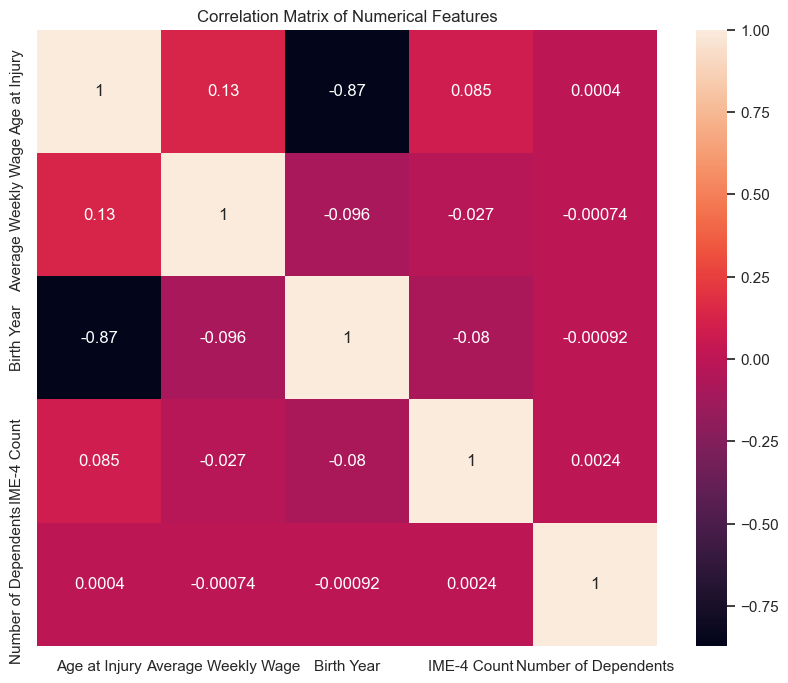

In [35]:
# Prepare figure
fig = plt.figure(figsize=(10, 8))

# Obtain correlation matrix.
corr = train_data[metric_features].corr(method="spearman")

# Plot heatmap of the correlation matrix
sns.heatmap(data=corr, annot=True, )
plt.title('Correlation Matrix of Numerical Features')

plt.show()


- As predicted before, there is a high correlation between "Birth Year" and "Age at Injury" (-0.87), and they also have the same number of unique values (108). With this in mind, and also the fact that "Birth Year" has almost 5% missing values, we consider removing this variable from contention.

<a class="anchor" id="section_8_4">

## 8.4. Bivariate Analysis - Categorical / Target

</a>

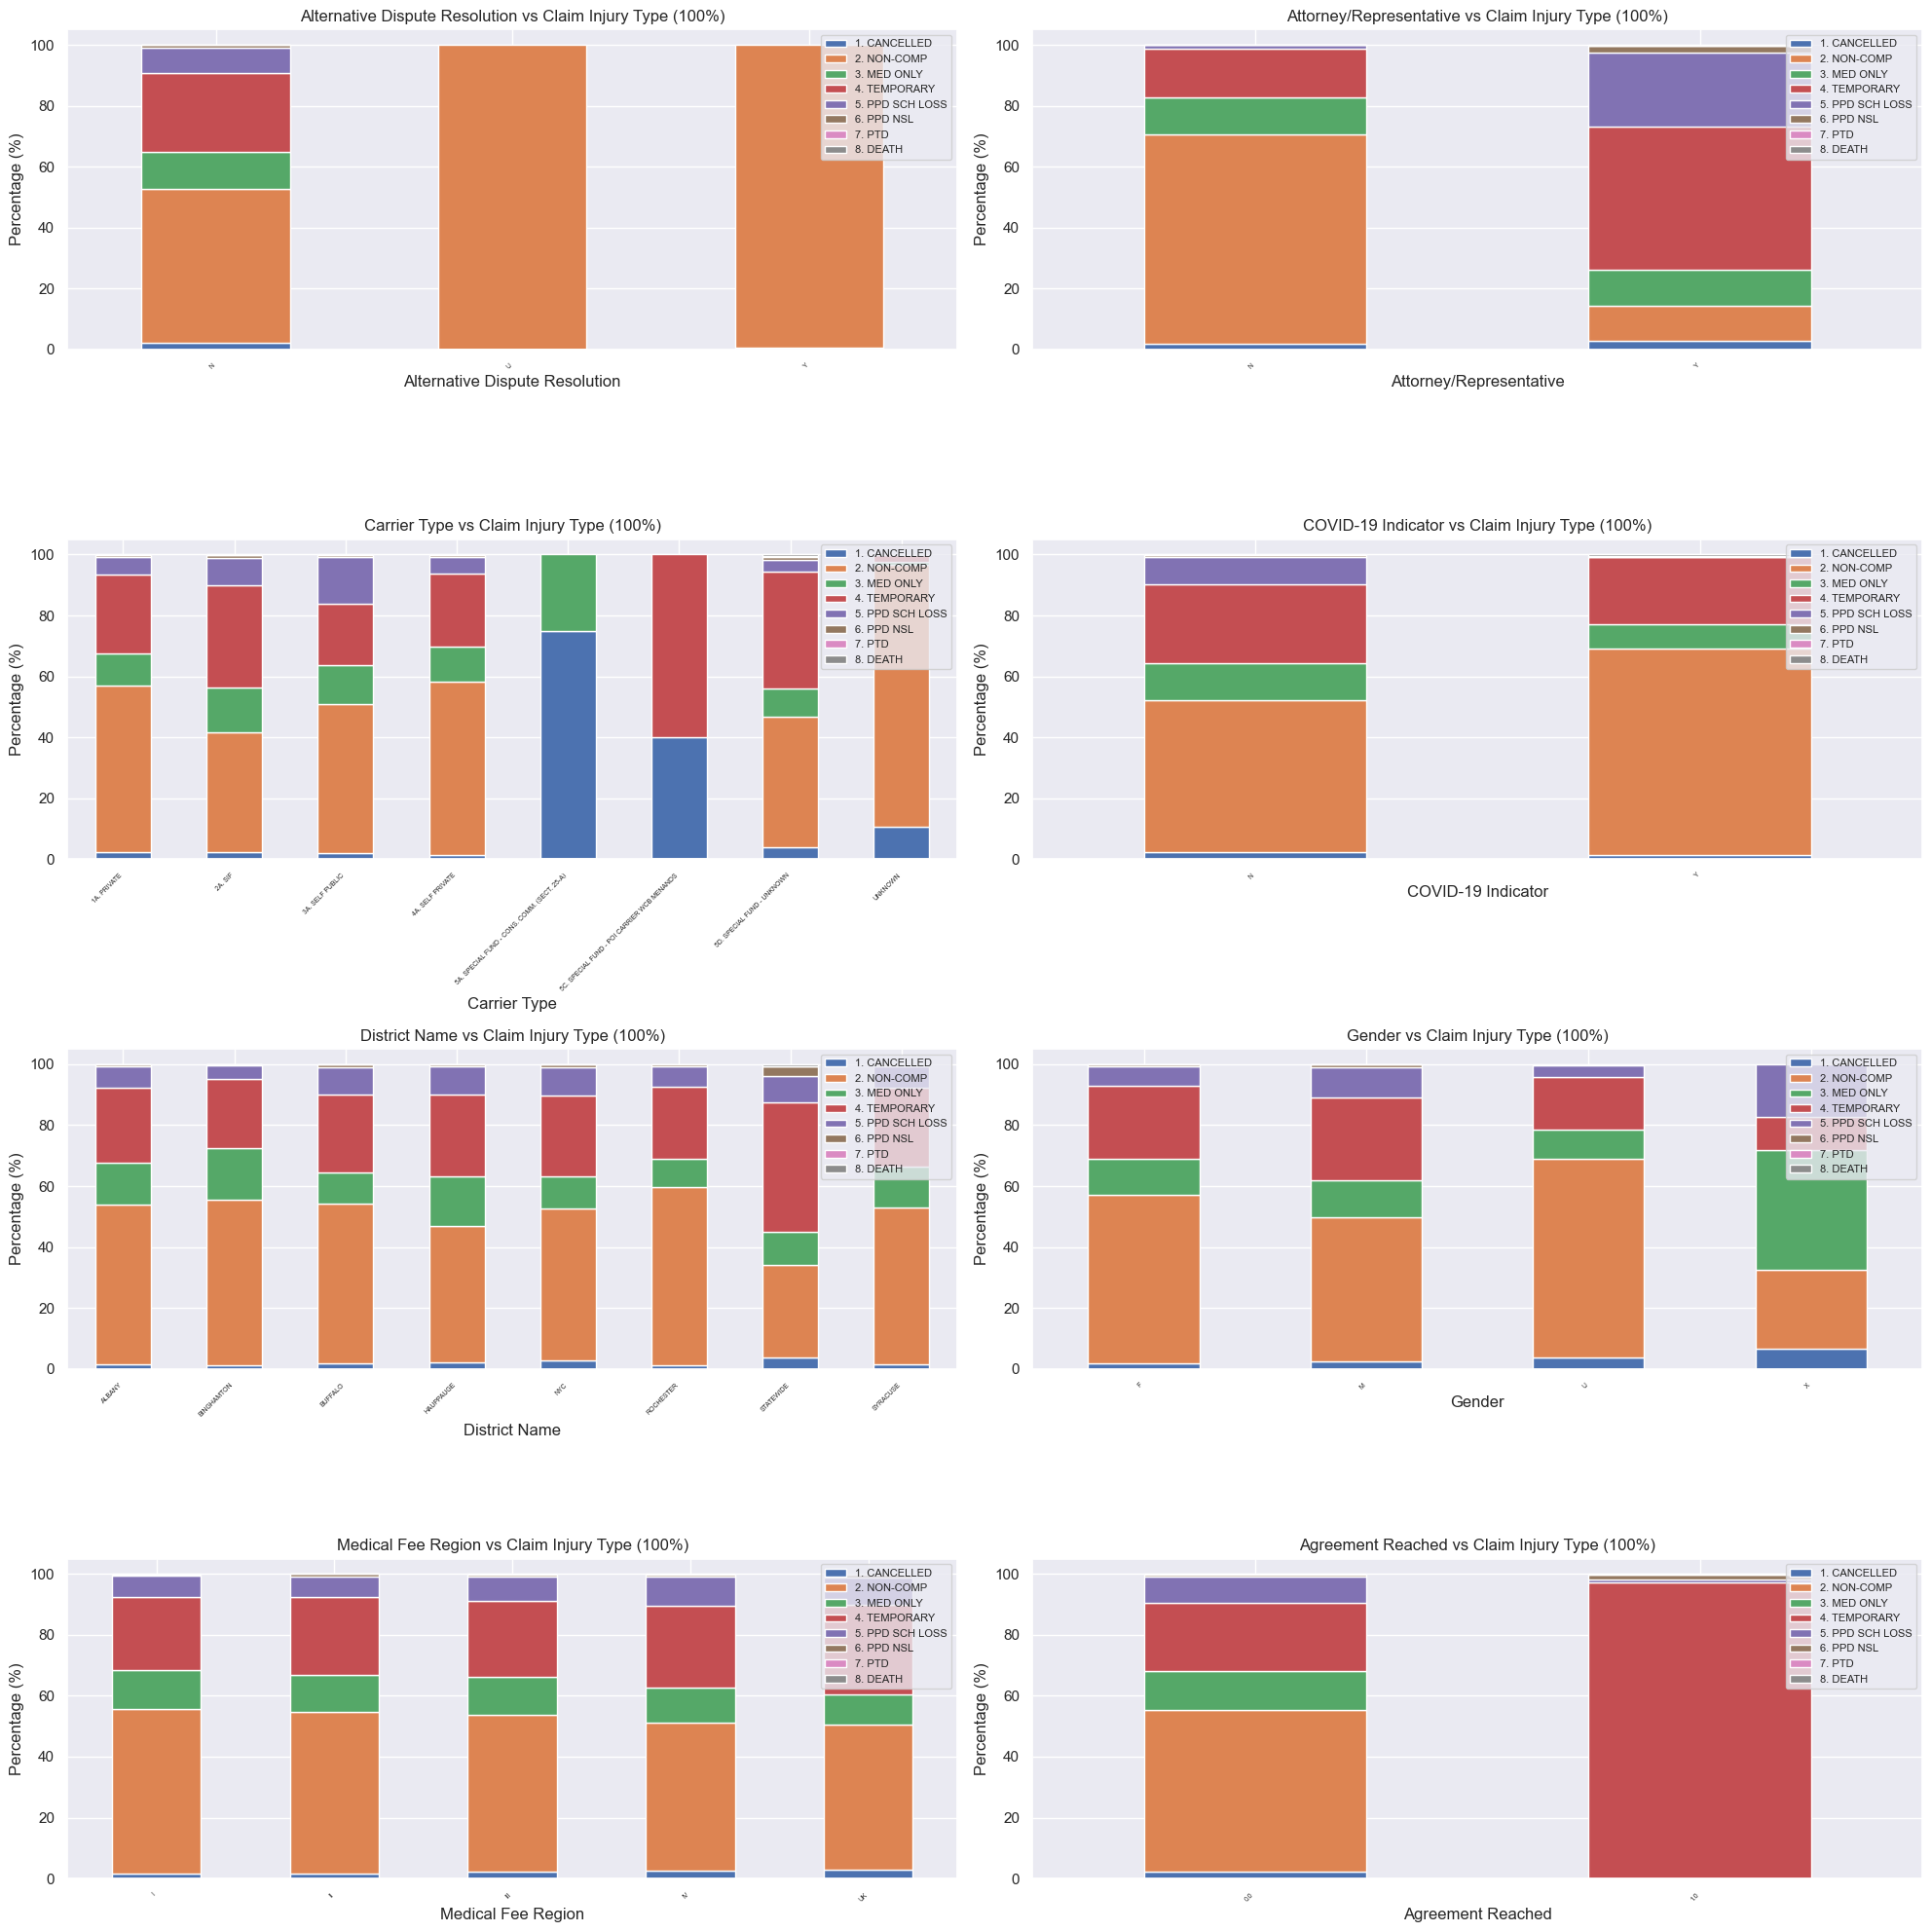

In [36]:
# Select categorical features (except dates and high cardinality categorical variables)
categorical_features = [
    'Alternative Dispute Resolution', 'Attorney/Representative', 'Carrier Type',
     'COVID-19 Indicator', 'District Name', 'Gender', 'Medical Fee Region', 'Agreement Reached'
]

target_var = 'Claim Injury Type'

# Number of columns
n_cols = 2
# Calculate number of rows
n_rows = (len(categorical_features) + n_cols - 1) // n_cols

# Create the subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 5 * n_rows))
axes = axes.flatten()

for i, feature in enumerate(categorical_features):
    ax = axes[i]

    grouped_data = train_data.groupby([feature, target_var]).size().unstack()

    normalized_data = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

    normalized_data.plot(
        kind='bar', stacked=True, ax=ax, title=f'{feature} vs {target_var} (100%)'
    )
    ax.set_ylabel('Percentage (%)')

    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=5)
    ax.legend(fontsize=8, loc='upper right')

# Remove the unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])


# Use tight layout to avoid overlapping
plt.tight_layout()
plt.show()

**Analysis:**

- Having an **"Attorney/Representative"** increases the chances of receiving compensation.
- As expected, when we have an **"Alternative Dispute Resolution"**, the claims will have no compensation.
- Two values of **"Carrier Type"** yield very different results when compared to other values for this variable. 
- **Medical Fee Region** - almost exact same proportions of the target classes across the categories of the feature. Likely has no prediction power. There is still a possibility that when grouped with another features they could be relevant.
- **District Name**  - This feature has similiar proportions of the target classes across the categories of the feature, meaning the relationship to the target is likely week and may have little predicition power.
- **"Agreement Reached"** shows that a different values will have a high impact on the targe variable.
- The remaining features will likely have a higher prediction power.

In [37]:
codes_desc = ['WCIO Cause of Injury Code', 'WCIO Cause of Injury Description',
       'WCIO Nature of Injury Code', 'WCIO Nature of Injury Description',
       'WCIO Part Of Body Code', 'WCIO Part Of Body Description',
       'Industry Code', 'Industry Code Description']
train_data[codes_desc].columns

Index(['WCIO Cause of Injury Code', 'WCIO Cause of Injury Description',
       'WCIO Nature of Injury Code', 'WCIO Nature of Injury Description',
       'WCIO Part Of Body Code', 'WCIO Part Of Body Description',
       'Industry Code', 'Industry Code Description'],
      dtype='object')

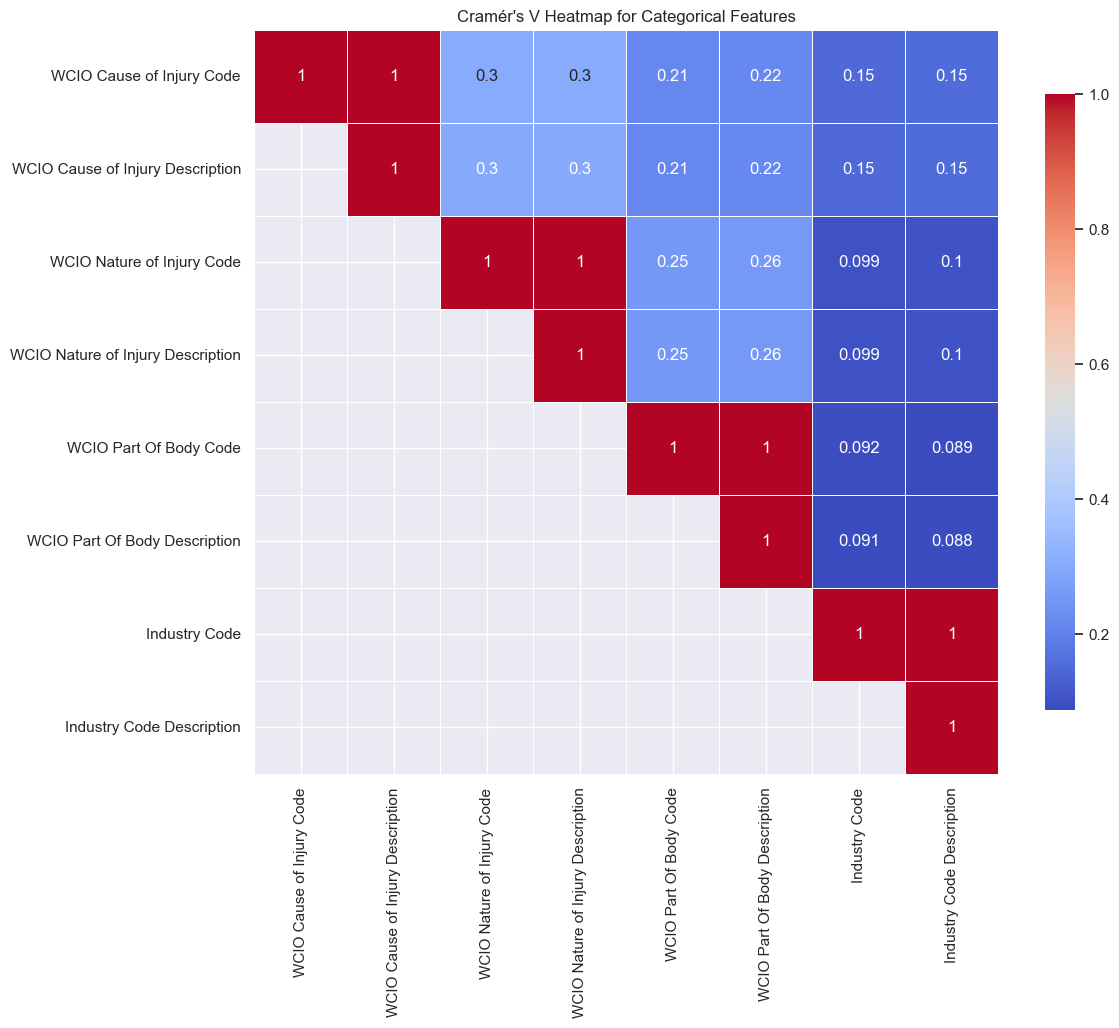

In [38]:
code_features = train_data[codes_desc].columns

# Compute Cramér's V
def cramers_v(x, y):
    contingency_table = pd.crosstab(x, y)
    chi2 = chi2_contingency(contingency_table)[0]
    n = contingency_table.sum().sum()
    r, k = contingency_table.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

# Cramér's V matrix
cramers_v_matrix = pd.DataFrame(index=code_features, columns=code_features)

# Calculate Cramér's V for each pair up to the diagonal
for i in range(len(code_features)):
    for j in range(i, len(code_features)):
        if i == j:
            cramers_v_matrix.iloc[i, j] = 1.0
        else:
            cramers_v_matrix.iloc[i, j] = cramers_v(train_data[code_features[i]], train_data[code_features[j]])

# Convert matrix to numeric to avoid plotting issues
cramers_v_matrix = cramers_v_matrix.astype(float)

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(cramers_v_matrix, annot=True, cmap="coolwarm", square=True, linewidths=.5, cbar_kws={'shrink': .8})
plt.title("Cramér's V Heatmap for Categorical Features")
plt.show()

As we have conjectured previously, when comparing feature whose only difference is "code" and "description", we have a perfect correlation between them. This tells us that we are free to drop these duplicated features.

Since we have numeric values on one hand, and strings on the other, we will discard the "description" features to ease the process.

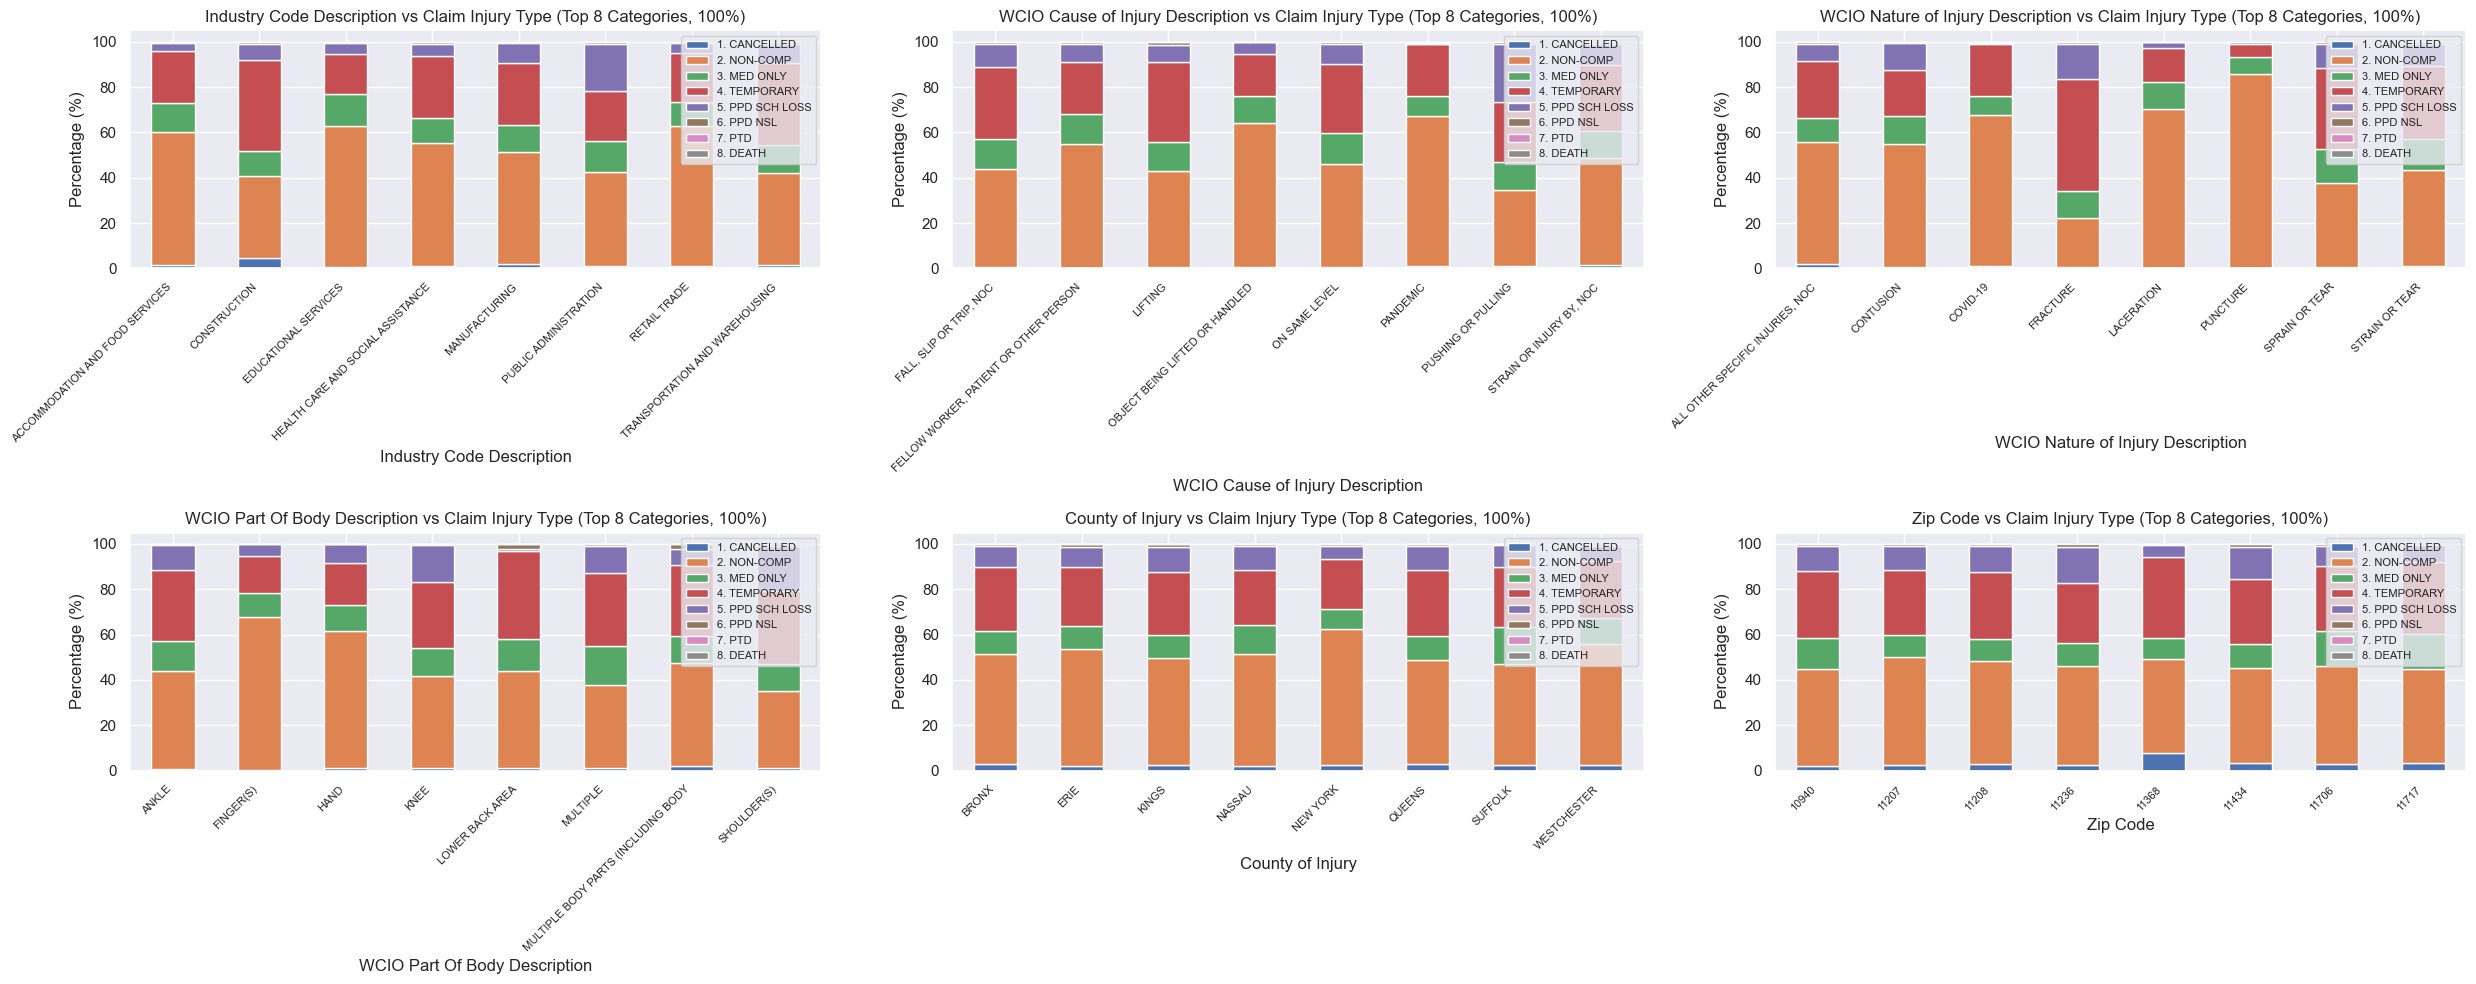

In [39]:
# High Cardinality Categorical Variables (except codes because we will use the correspondent descriptions)
categorical_features_highcar = [
    'Industry Code Description', 'WCIO Cause of Injury Description',
    'WCIO Nature of Injury Description', 'WCIO Part Of Body Description',
    'County of Injury', 'Zip Code'
]

target_var = 'Claim Injury Type'

# Maximum nº of categories
max_categories = 8

n_cols = 3
n_rows = (len(categorical_features_highcar) + n_cols - 1) // n_cols


fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(25, 5 * n_rows))
axes = axes.flatten()

for i, feature in enumerate(categorical_features_highcar):
    ax = axes[i]

    top_categories = train_data[feature].value_counts().nlargest(max_categories).index
    filtered_data = train_data[train_data[feature].isin(top_categories)]

    grouped_data = filtered_data.groupby([feature, target_var]).size().unstack()

    normalized_data = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

    normalized_data.plot(
        kind='bar', stacked=True, ax=ax, title=f'{feature} vs {target_var} (Top {max_categories} Categories, 100%)'
    )
    ax.set_ylabel('Percentage (%)')

    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=8)
    ax.legend(fontsize=8, loc='upper right')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**Analysis:**
- We can see that most variables have difference between their values and the proportion of the target variable results. However, **Zip Code and County of Injury**  have similiar proportions of the target classes across the categories of the feature, meaning the relationship to the target is likely week and may have little predicition power. So let's check in detail:

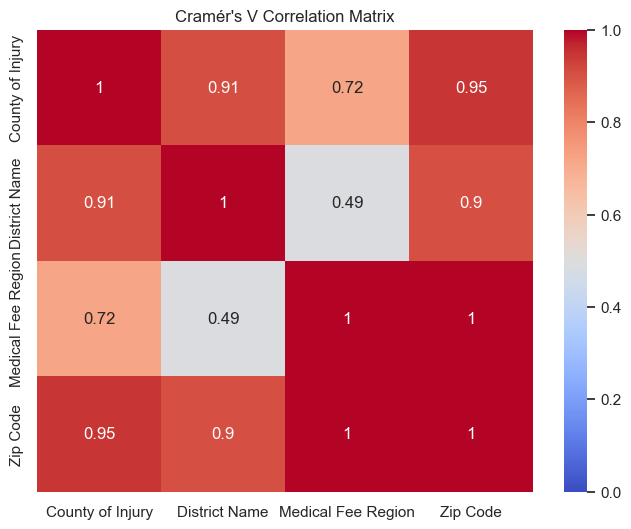

In [40]:
# Check correlation between location related variables
columns = ["County of Injury", "District Name", "Medical Fee Region", "Zip Code"]

cramers_v_matrix = pd.DataFrame(np.zeros((len(columns), len(columns))),
                                index=columns,
                                columns=columns)

for col1 in columns:
    for col2 in columns:
        if col1 != col2:
            cramers_v_matrix.loc[col1, col2] = cramers_v(train_data[col1], train_data[col2])
        else:
            cramers_v_matrix.loc[col1, col2] = 1

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cramers_v_matrix, annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.title("Cramér's V Correlation Matrix")
plt.show()

In [41]:
train_data["Zip Code"].unique()

array(['13662', '14569', '12589', ..., 'G9B0Y', '15143', '07122'],
      dtype=object)

We can see that "Zip Code" not only has a high correlation with "Medical Fee Region", but also with the other two variables related to location.
Since "Zip Code" has inconsistencies (values with letters) and a high percentage of missing values (~5%) we will drop this feature.

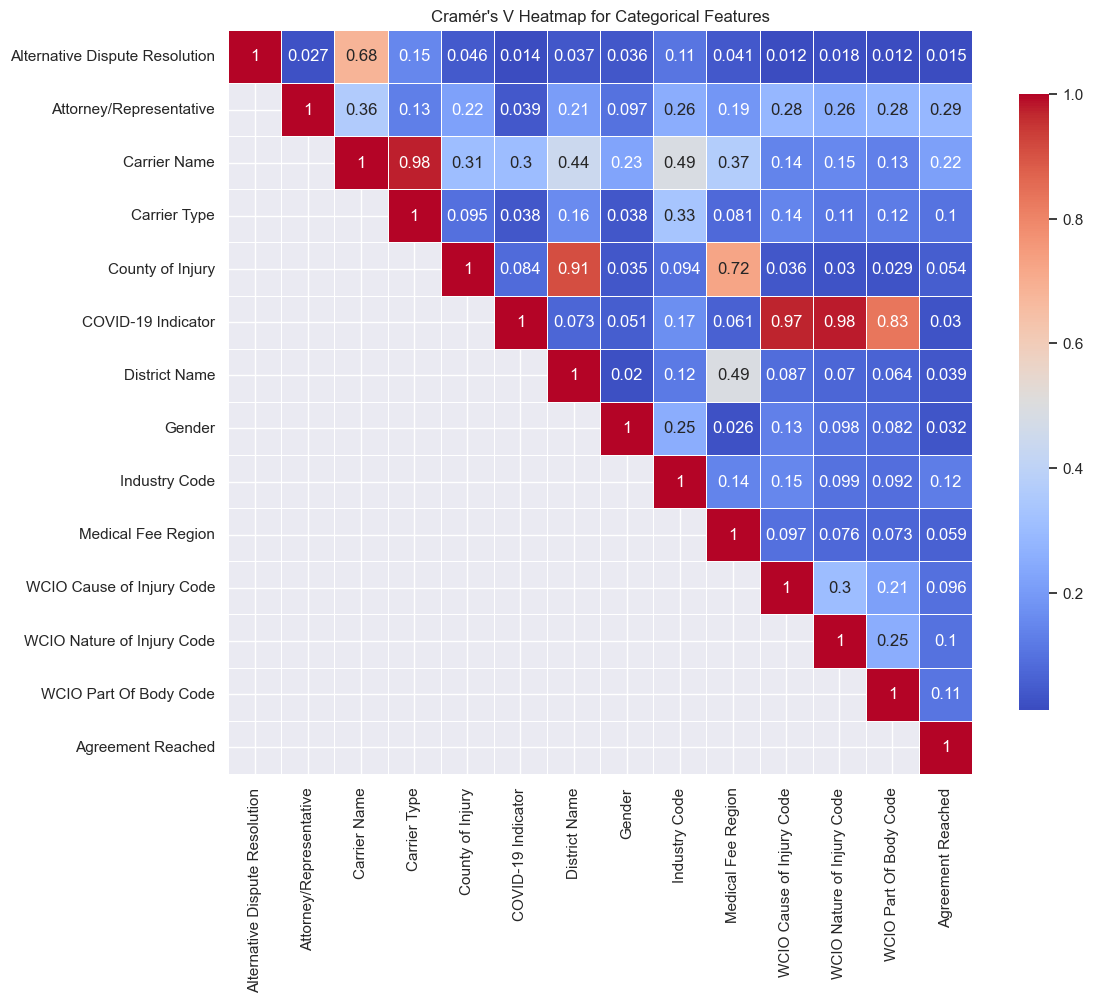

In [42]:
categorical_features = ['Alternative Dispute Resolution', 'Attorney/Representative', 'Carrier Name', 'Carrier Type',
       'County of Injury', 'COVID-19 Indicator', 'District Name', 'Gender',
       'Industry Code', 'Medical Fee Region', 'WCIO Cause of Injury Code',
       'WCIO Nature of Injury Code', 'WCIO Part Of Body Code',
       'Agreement Reached']


# Cramér's V matrix
cramers_v_matrix = pd.DataFrame(index=categorical_features, columns=categorical_features)

# Calculate Cramér's V for each pair up to the diagonal
for i in range(len(categorical_features)):
    for j in range(i, len(categorical_features)):
        if i == j:
            cramers_v_matrix.iloc[i, j] = 1.0
        else:
            cramers_v_matrix.iloc[i, j] = cramers_v(train_data[categorical_features[i]], train_data[categorical_features[j]])

# Convert matrix to numeric to avoid plotting issues
cramers_v_matrix = cramers_v_matrix.astype(float)

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(cramers_v_matrix, annot=True, cmap="coolwarm", square=True, linewidths=.5, cbar_kws={'shrink': .8})
plt.title("Cramér's V Heatmap for Categorical Features")
plt.show()

It is clear that "COVID-19 Indicator" has a high correlation with the 3 "WCIO" codes, however, the fact that these variables have a different relation with the target leads us to believe that it might be worth to keep them to see how they'll affect the final model.

<a class="anchor" id="section_8_5">

## 8.5. Multivariate Analysis

</a>

## Important note:
Before analysing visually the relationship between variables, it is necessary to address the issue of missing values and/or outliers.

Given what we have seen in the univariate analysis, it will be impossible to draw any conclusions from some of those variables. As such we will perform some preprocessing by imputing nans, limiting/removing outliers and addressing werid values. 

Since this is just the EDA, the values we use here won't be the same values we'll see in the actual preprocessing (the data will be treated in a way to avoid Data Leakage), but it will be closer to those future values.

The variables in dire need of preprocessing are: "Average Weekly Wage", "Age at Injury" and "IME-4 Count"

In [43]:
# Fill the missing values with zeros

train_data['Average Weekly Wage'] = train_data['Average Weekly Wage'].replace(0, np.nan)
train_data['Age at Injury'] = train_data['Age at Injury'].replace(0, np.nan)
train_data['IME-4 Count'] = train_data['IME-4 Count'].fillna(0)

In [44]:
#searching for a categorical feature plausible to fill the nan values on 'Average Weekly Wage'

train_data.groupby('Carrier Type')['Average Weekly Wage'].mean().sort_values(ascending=False)

Carrier Type
3A. SELF PUBLIC                                1574.429537
2A. SIF                                        1243.122691
1A. PRIVATE                                    1210.057051
4A. SELF PRIVATE                                906.020597
5D. SPECIAL FUND - UNKNOWN                      817.368813
UNKNOWN                                         677.360000
5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)            NaN
5C. SPECIAL FUND - POI CARRIER WCB MENANDS             NaN
Name: Average Weekly Wage, dtype: float64

In [45]:
train_data.groupby('District Name')['Average Weekly Wage'].mean().sort_values(ascending=False)

District Name
HAUPPAUGE     1401.795822
NYC           1342.673150
ALBANY        1249.674941
STATEWIDE     1240.620892
SYRACUSE      1210.646664
BINGHAMTON    1151.601407
BUFFALO       1087.522067
ROCHESTER      948.885111
Name: Average Weekly Wage, dtype: float64

In [46]:
train_data.groupby('Industry Code')['Average Weekly Wage'].median().sort_values(ascending=False)

Industry Code
22.0    2124.000
51.0    1962.705
92.0    1534.200
55.0    1252.980
21.0    1190.750
48.0    1173.820
23.0    1097.550
53.0    1026.020
52.0    1000.970
62.0     997.910
42.0     991.935
33.0     987.860
54.0     966.080
31.0     962.710
32.0     944.230
71.0     942.570
61.0     892.345
49.0     809.510
81.0     806.750
56.0     803.845
11.0     763.150
44.0     722.370
45.0     712.055
72.0     642.890
Name: Average Weekly Wage, dtype: float64

Looking at the variation of values given a categorical variable, we decided to fill the values of "Average Weekly Wage" based on the Industry Code - the values have a high range and there are 25 different values, assuring there is variability.

In [47]:
def bound_iqr_outliers(data, feature, lower_percentile=0.25, upper_percentile=0.75, multiplier=1.5):
    Q1 = data[feature].quantile(lower_percentile)
    Q3 = data[feature].quantile(upper_percentile)
    IQR = Q3 - Q1
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    return lower_bound, upper_bound

def apply_winsorization(data, feature, upper_limit):
    # Convert to float to avoid issues with datatypes
    data[feature] = data[feature].astype(float)
    data[feature] = data[feature].clip(upper=upper_limit)
    return data

In [48]:

wage_medians = train_data.groupby('Industry Code')['Average Weekly Wage'].median()

def fill_nan_wage(row):
    if pd.isnull(row['Average Weekly Wage']):
        return wage_medians.get(row['Industry Code'], wage_medians.median())
    else:
        return row['Average Weekly Wage']

train_data['Average Weekly Wage'] = train_data.apply(fill_nan_wage, axis=1)
upper_limit_wage = train_data['Average Weekly Wage'].quantile(0.95)

train_data = apply_winsorization(train_data, "Average Weekly Wage", upper_limit_wage)


In [49]:
# For the "Age at Injury", we will get the year of the accident and subtract "Birth Year" from it
train_data["Accident Date"] = pd.to_datetime(train_data["Accident Date"], errors='coerce')
train_data['Accident Year'] = train_data['Accident Date'].dt.year
train_data['Age at Injury'] = np.where(
    # We only want to input if there is a value not if there is nan
    train_data['Accident Year'].notna() & train_data['Birth Year'].notna(),
    (train_data['Accident Year'] - train_data['Birth Year']).astype('Int64'),  # Use 'Int64' to allow NaN
    train_data['Age at Injury']  # Keep existing values if the condition is not met
)

median_age_injury = train_data['Age at Injury'].median()

train_data['Age at Injury'] = train_data['Age at Injury'].fillna(median_age_injury)

_, upper_bound = bound_iqr_outliers(train_data, 'Age at Injury')

train_data["Age at Injury"] = train_data["Age at Injury"].apply(lambda x : x if x <=upper_bound else upper_bound)

In [50]:
train_data["IME-4 Count"] = train_data["IME-4 Count"].astype('Int64')
upper_limit_ime4 = train_data["IME-4 Count"].quantile(0.99)

train_data = apply_winsorization(train_data,"IME-4 Count", upper_limit_ime4)

In [51]:
metric_features = ['Age at Injury', 'Average Weekly Wage', 'Accident Year', 'IME-4 Count','Number of Dependents']

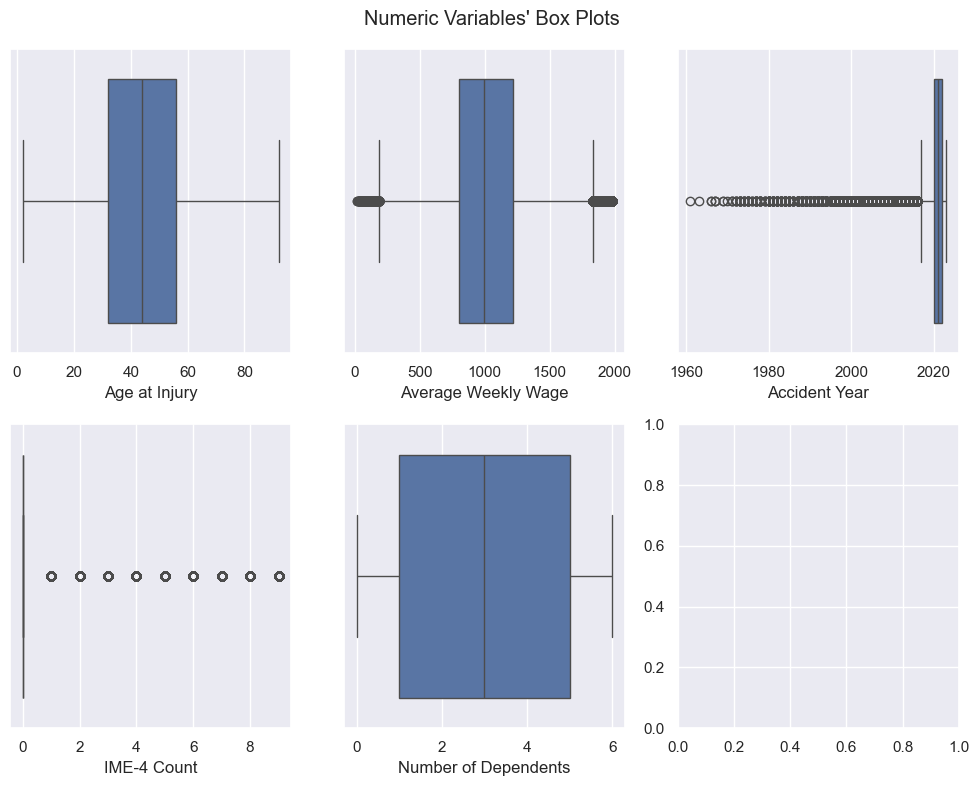

In [52]:
sns.set()
sp_rows = 2
sp_cols = ceil(len(metric_features) / sp_rows)

fig, axes = plt.subplots(sp_rows,
                         sp_cols,
                         figsize=(10, 8),
                         tight_layout=True
                        )


for ax, feat in zip(axes.flatten(), metric_features):
    sns.boxplot(x=train_data[feat], ax=ax)


title = "Numeric Variables' Box Plots"

plt.suptitle(title)

plt.show()

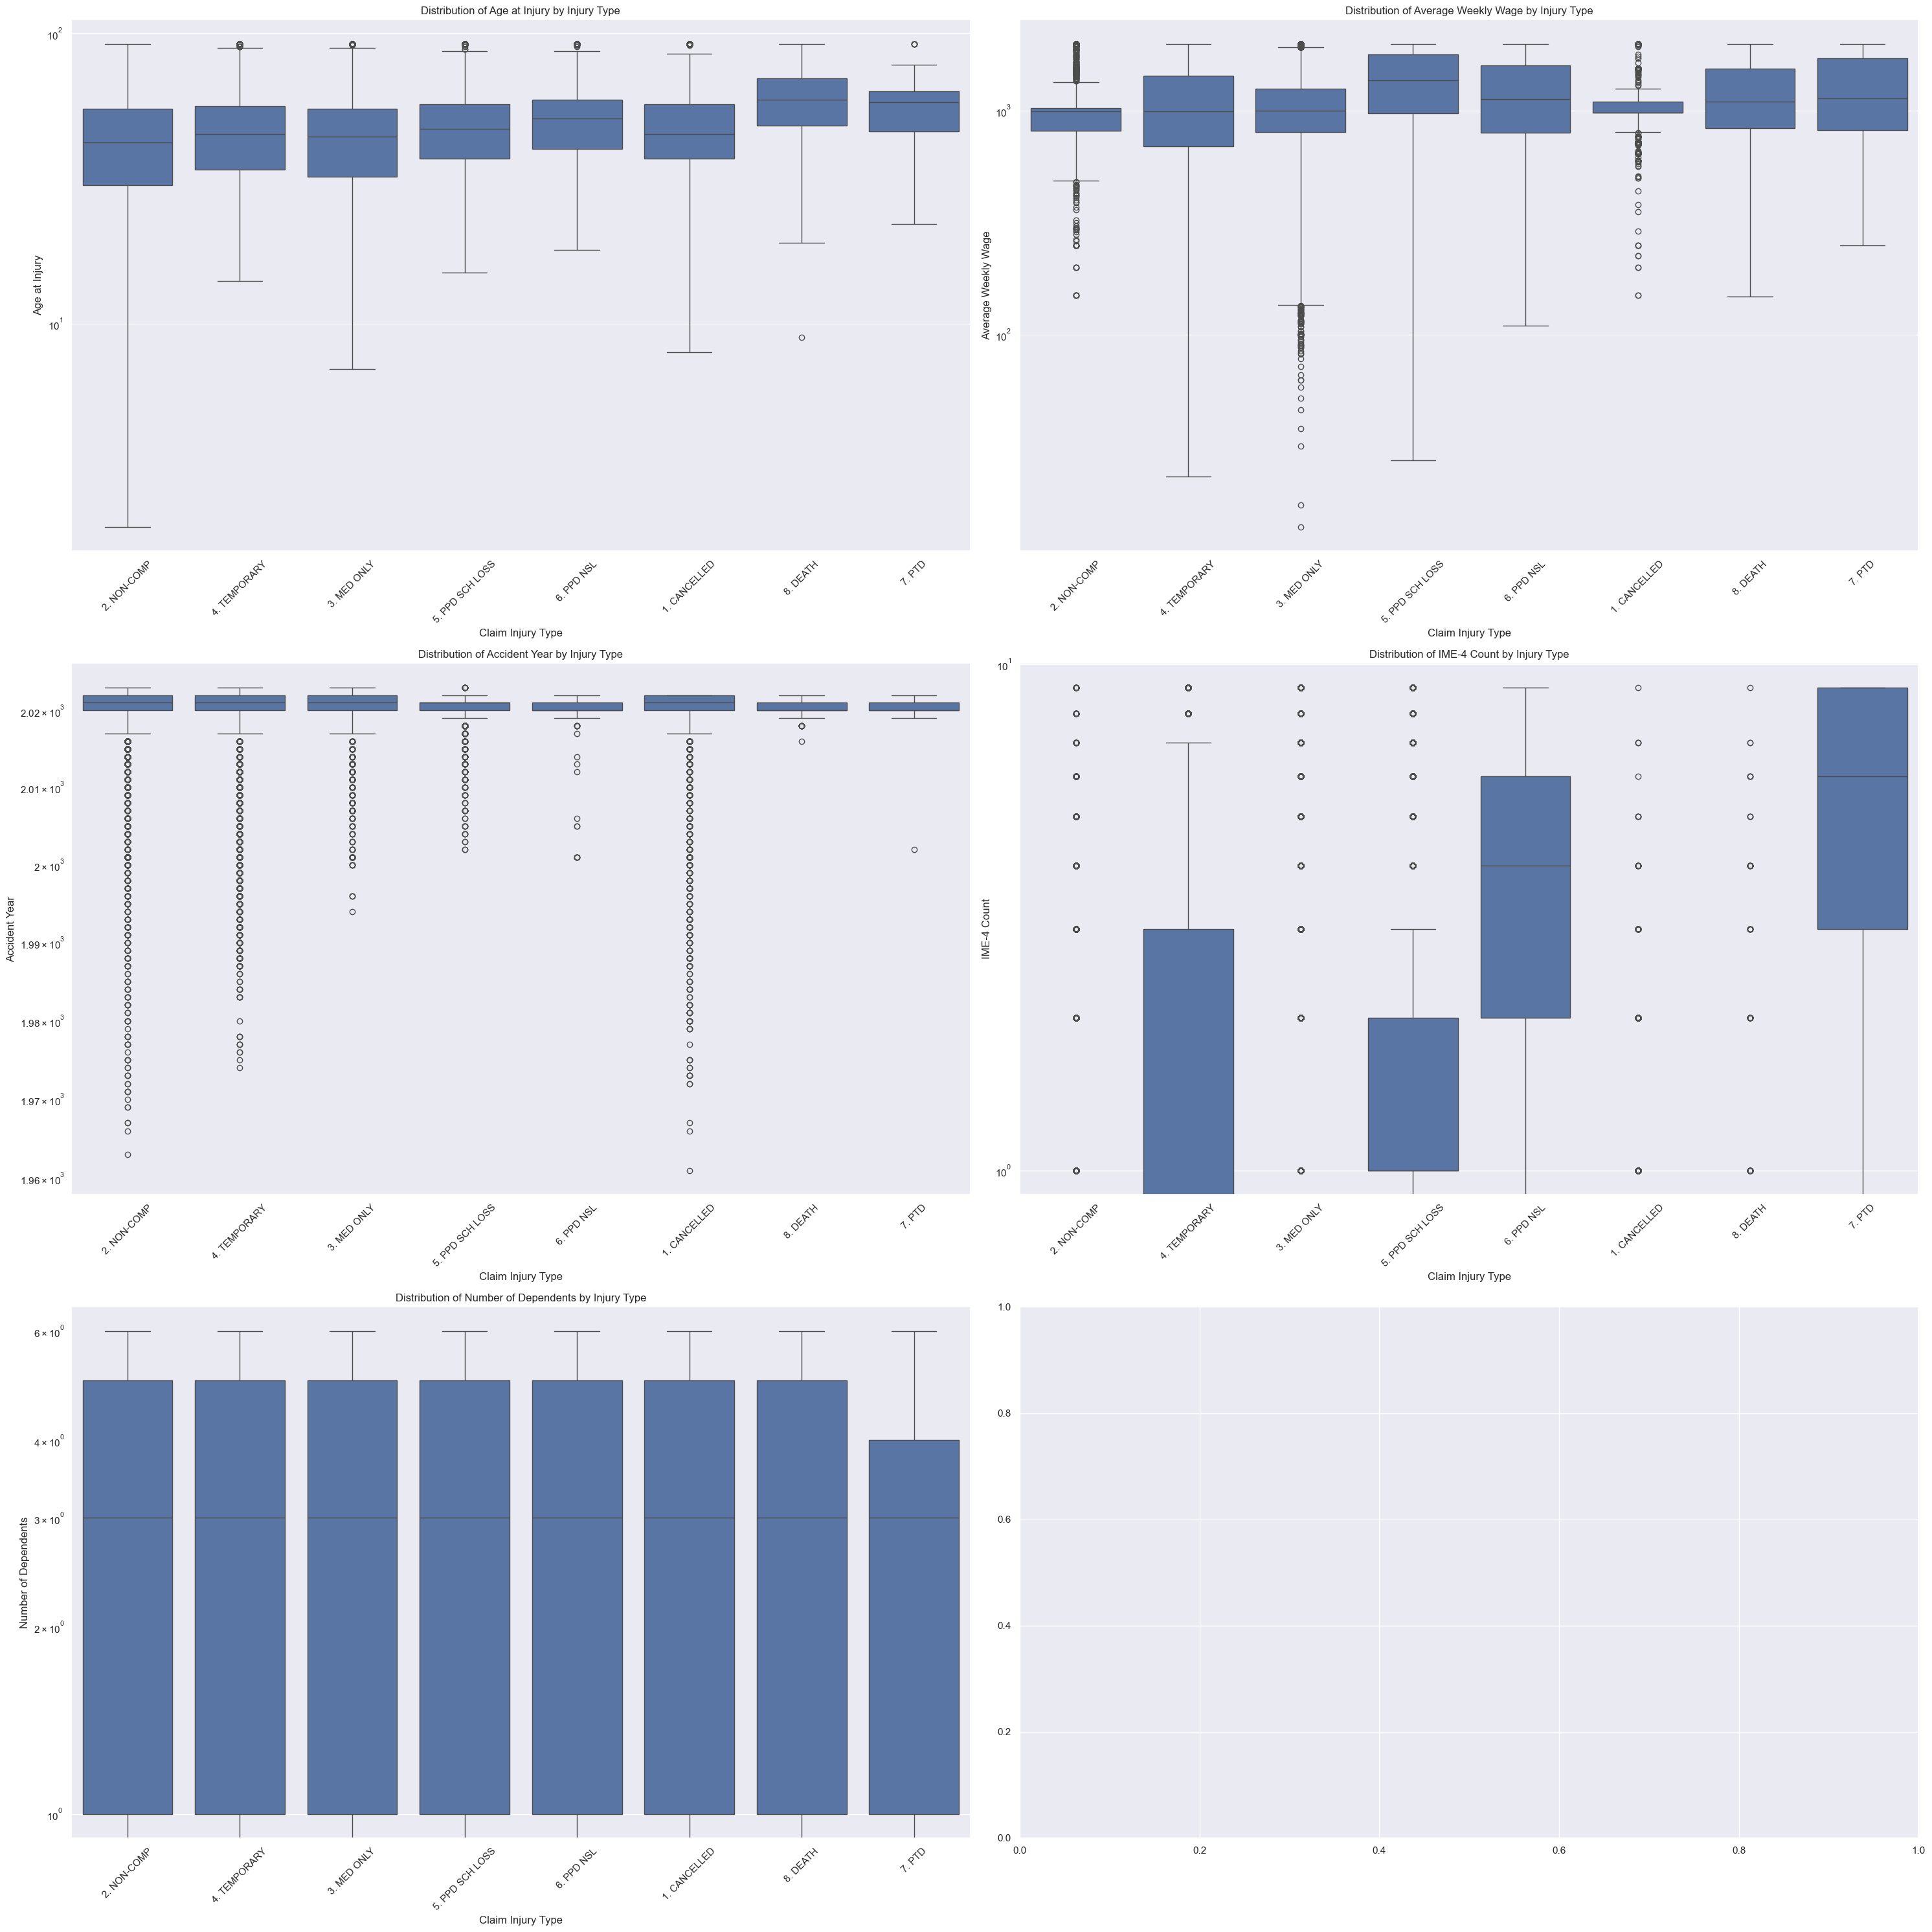

In [53]:
# Determine the number of variables to be plotted
num_vars = len(metric_features)

# Prepare figure. Create individual axes where each bar plot will be placed
fig, axes = plt.subplots(3,2, figsize=(6 * num_vars, 30), tight_layout=True)

# Iterate over axes and feature list
for ax, feat in zip(axes.flatten(), metric_features):
    # Create a boxplot for each variable, associating it with the correct axis (ax)
    sns.boxplot(x='Claim Injury Type', y=feat, data=train_data, ax=ax)
    ax.set_title(f'Distribution of {feat} by Injury Type')

    # Set labels for the x and y axes
    ax.set_xlabel('Claim Injury Type')
    ax.set_ylabel(feat)
    ax.tick_params(axis='x', rotation=45)
    ax.set_yscale('log')

plt.tight_layout()  # Adjust layout to prevent overlap between subplots
plt.show()

Looking at the interactions between categorical and numerical data with the target variable, we conclude that differences in "Carrier Type", "Agreement Reached" and "IME-4 Count" affect the value in the target variable.

Let's see how these interact with other variables.

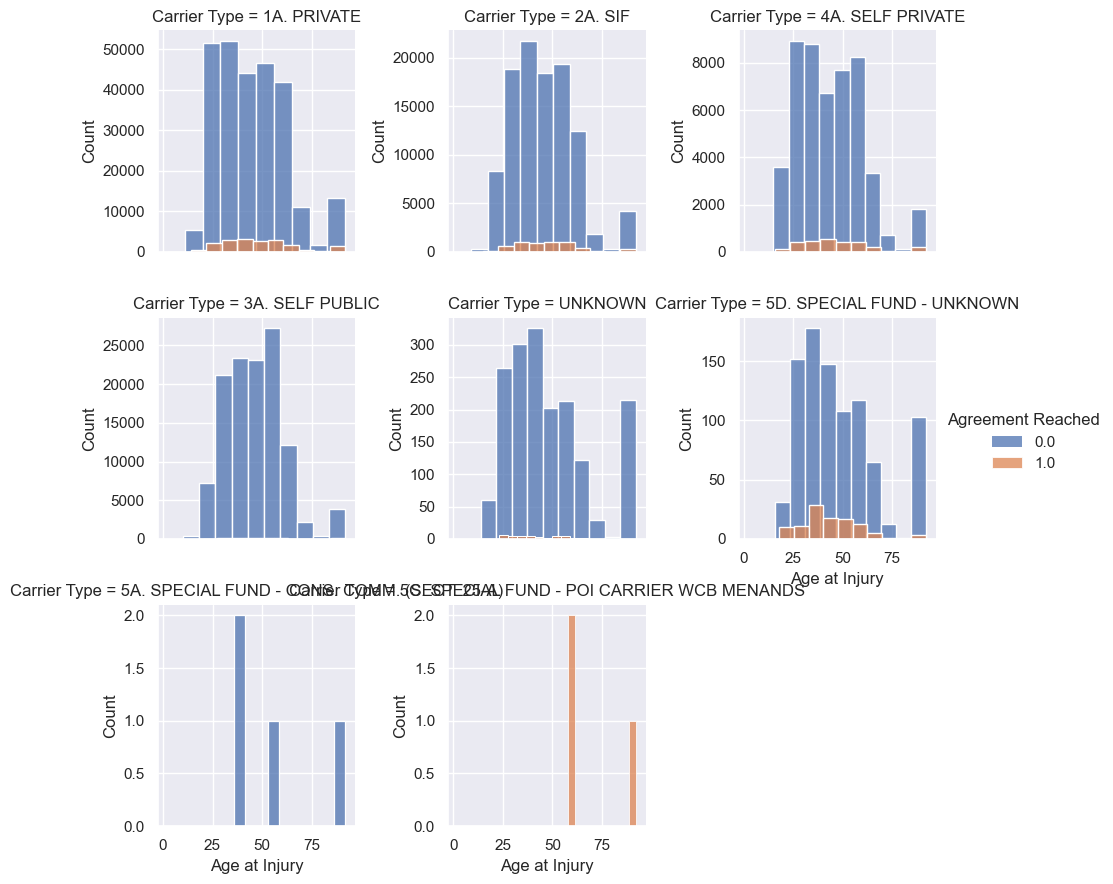

In [54]:
g = sns.FacetGrid(train_data, col='Carrier Type', hue='Agreement Reached', col_wrap=3, sharey=False)
g.map_dataframe(sns.histplot, x='Age at Injury', bins = 10)
g.add_legend()

plt.show()

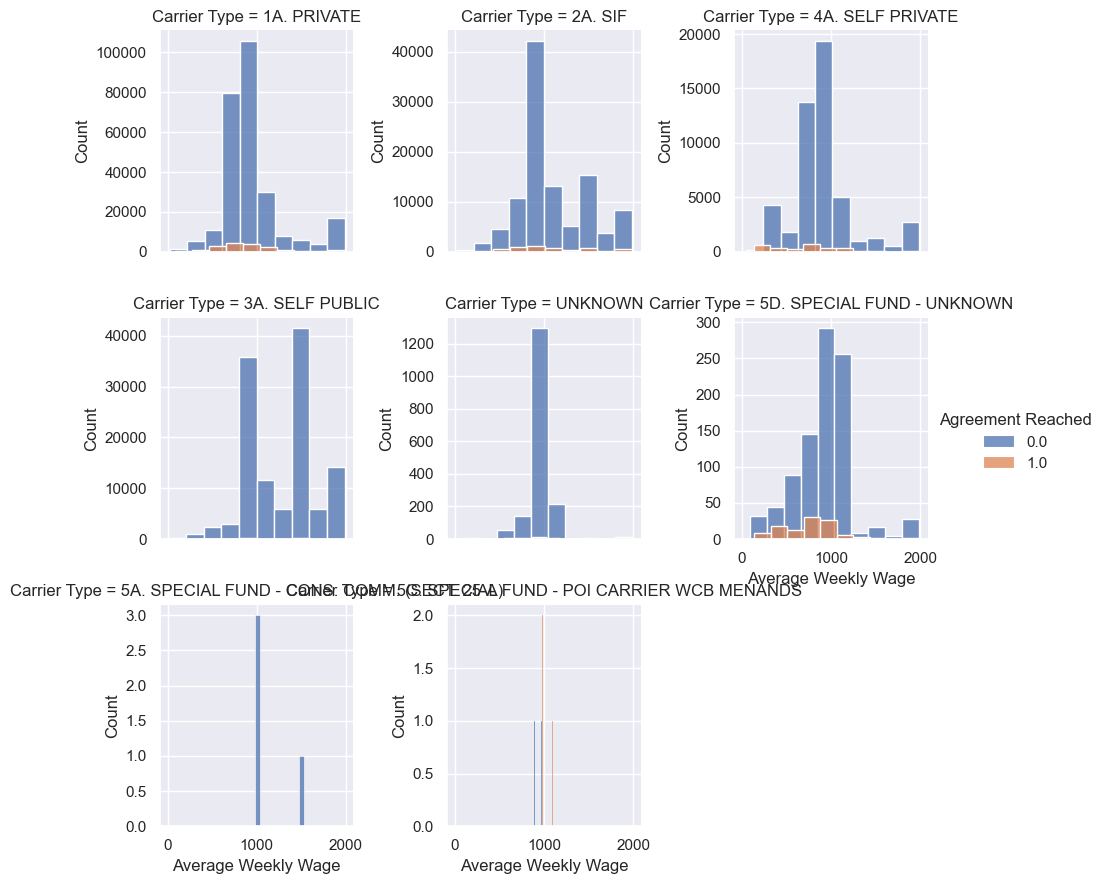

In [55]:
g = sns.FacetGrid(train_data, col='Carrier Type', hue='Agreement Reached', col_wrap=3, sharey=False)
g.map_dataframe(sns.histplot, x='Average Weekly Wage', bins = 10)
g.add_legend()

plt.show()

Looking at different numeric variables separated by "Carrier Type"(s), and "Agreement Reached", we can see that higher salaries usually do not reach and agreement, while age does not seem to have an impact on it.

Also, we can conclude that Private Carriers have a higher count of agreements (despite the proportion still being very low)

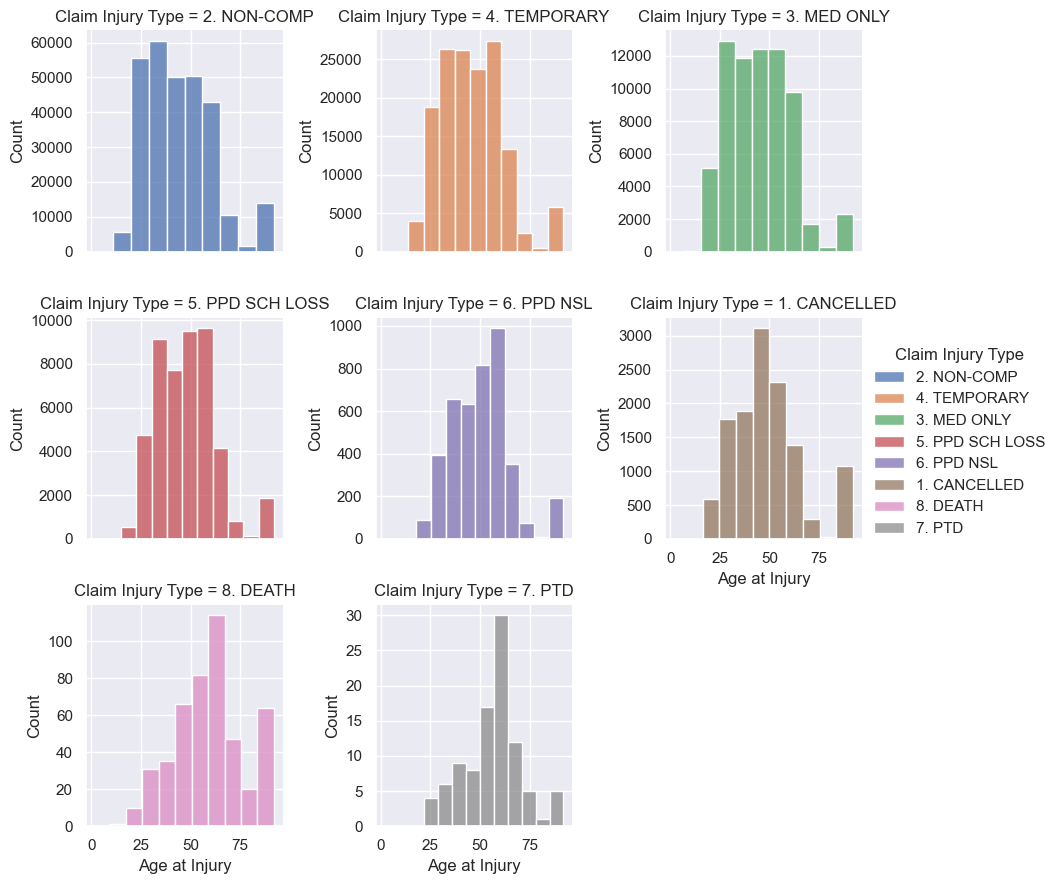

In [56]:
g = sns.FacetGrid(train_data, col='Claim Injury Type', hue='Claim Injury Type', col_wrap=3, sharey=False)
g.map_dataframe(sns.histplot, x='Age at Injury', bins = 10)
g.add_legend()

plt.show()

"Age at Injury" does not have an effect on the outcome of the claim, but the number of "IME-4" forms, does. As such, it is very likely that this will be an important variable to keep in the model.

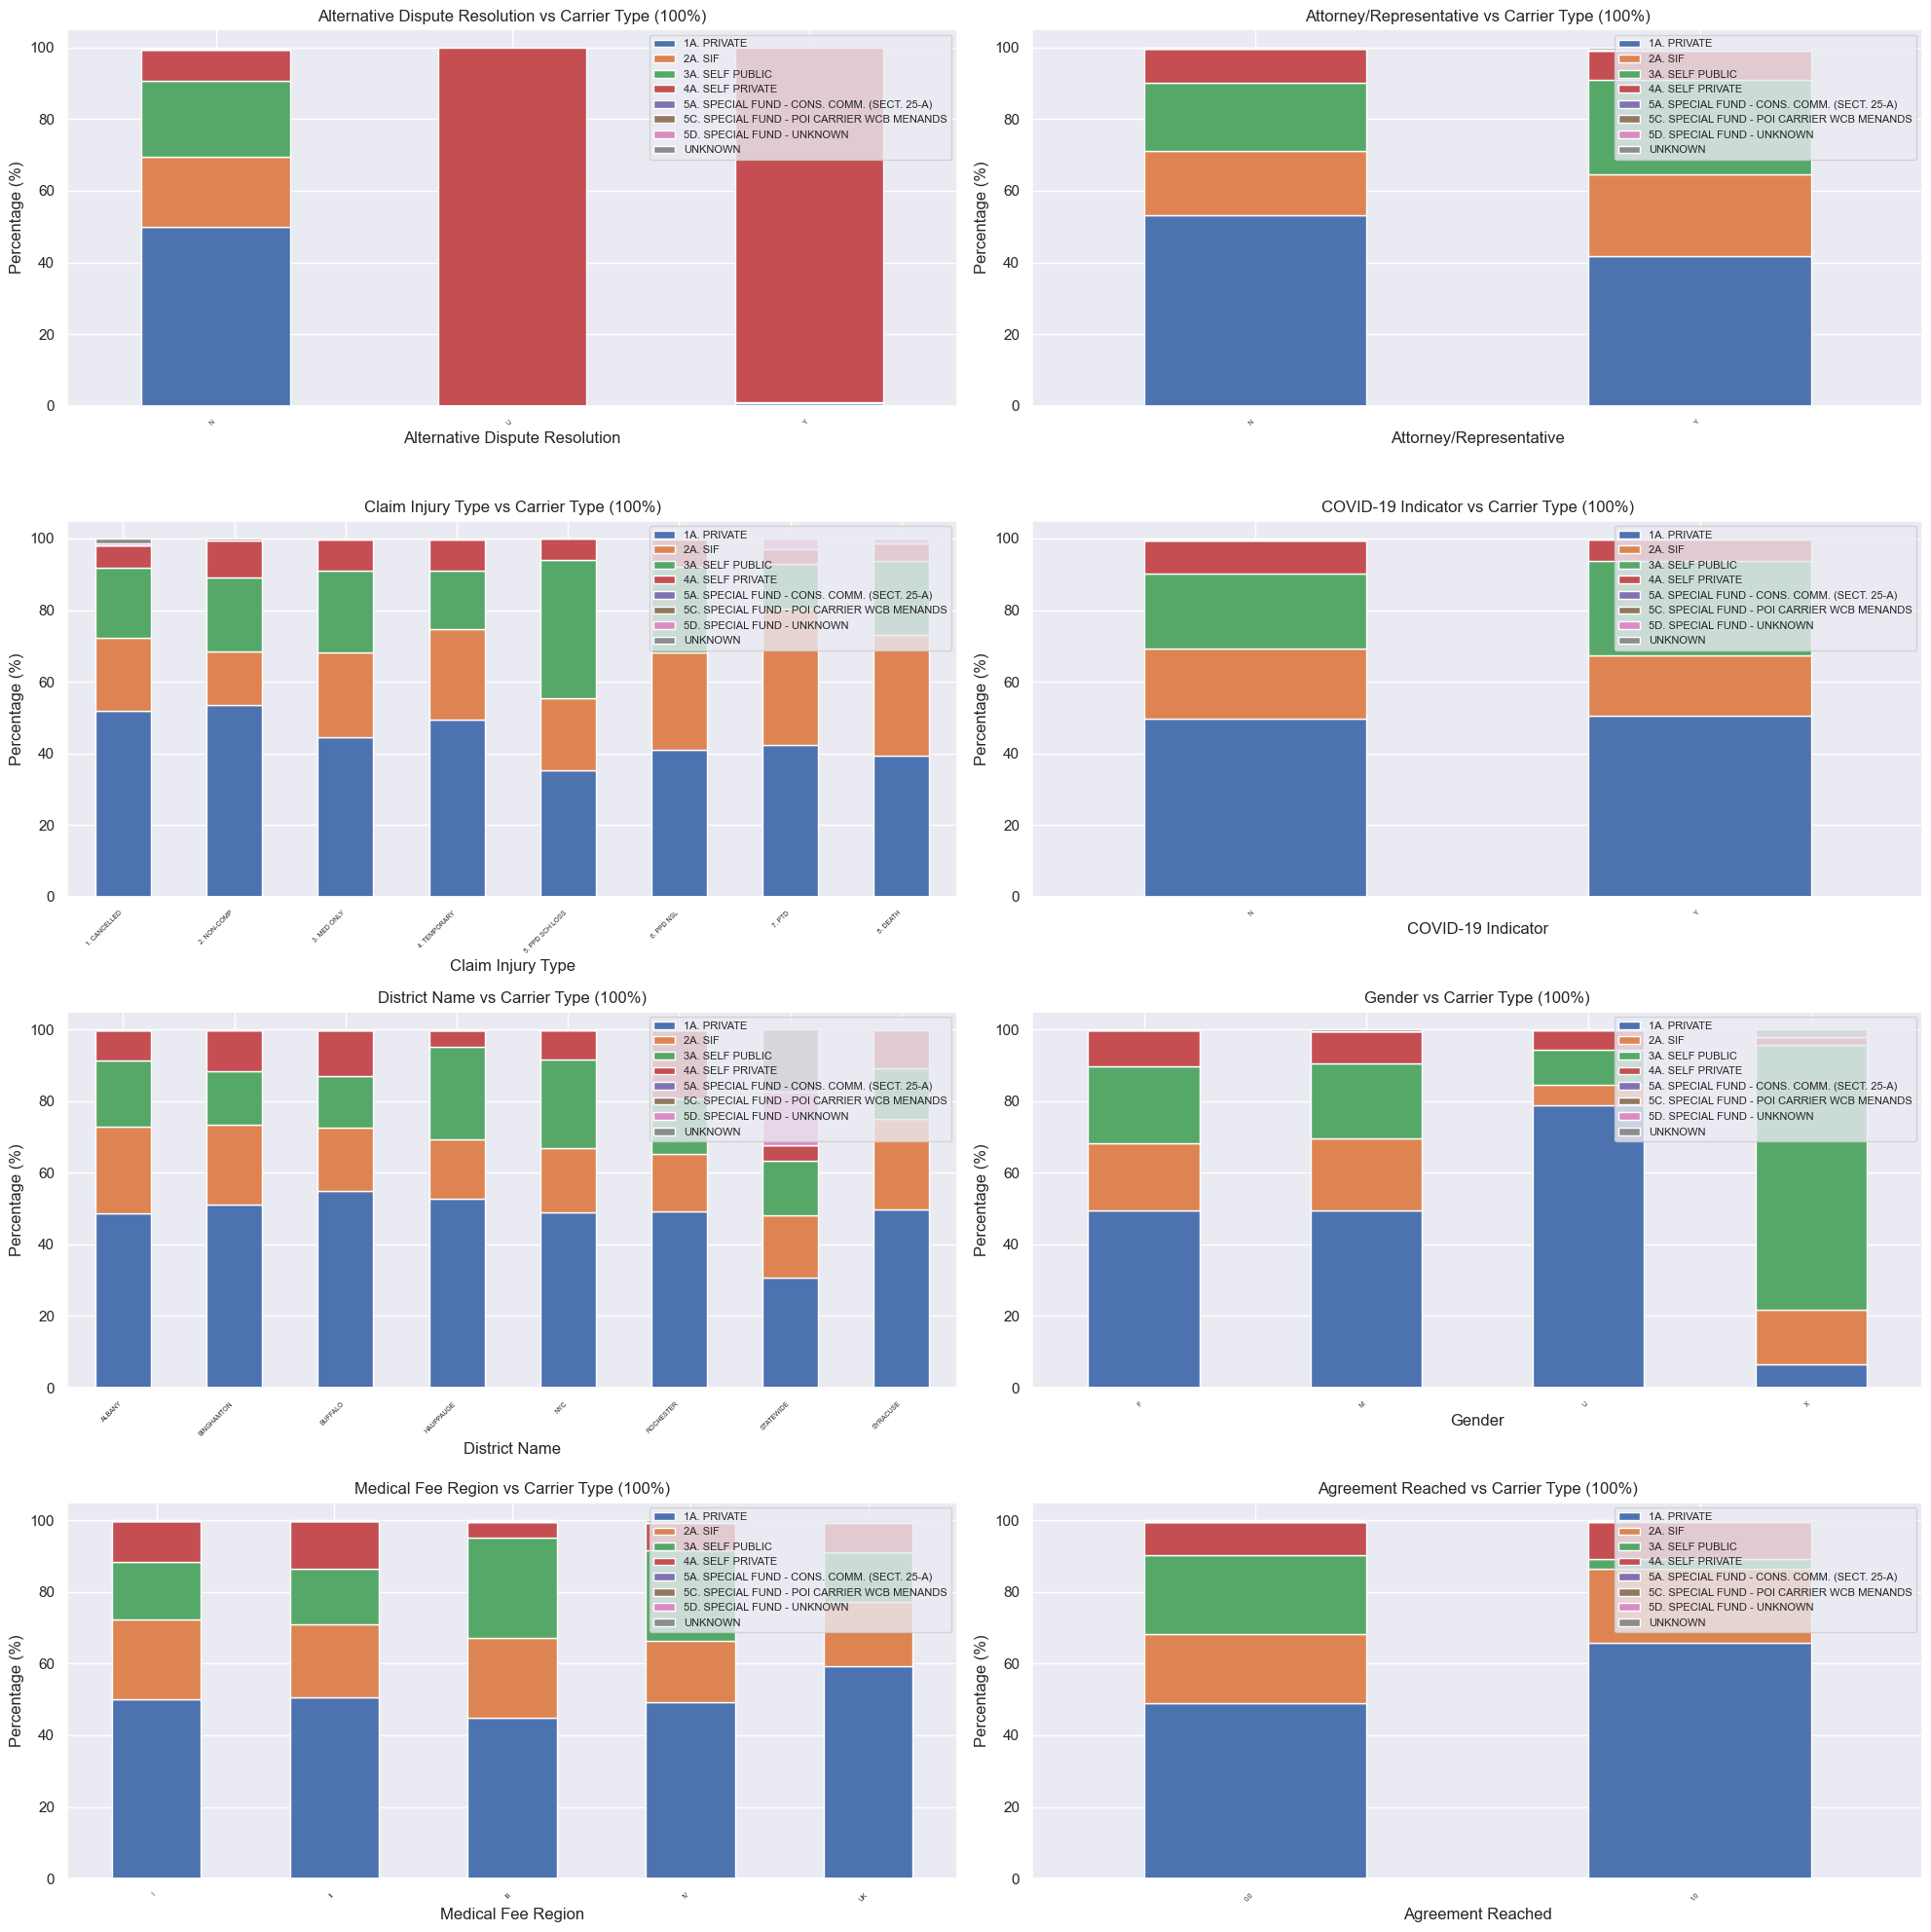

In [57]:
categorical_features = [
    'Alternative Dispute Resolution', 'Attorney/Representative', "Claim Injury Type",
     'COVID-19 Indicator', 'District Name', 'Gender', 'Medical Fee Region', 'Agreement Reached'
]

target_var = 'Carrier Type'

# Number of columns
n_cols = 2
# Calculate number of rows
n_rows = (len(categorical_features) + n_cols - 1) // n_cols

# Create the subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 5 * n_rows))
axes = axes.flatten()

for i, feature in enumerate(categorical_features):
    ax = axes[i]

    grouped_data = train_data.groupby([feature, target_var]).size().unstack()

    normalized_data = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

    normalized_data.plot(
        kind='bar', stacked=True, ax=ax, title=f'{feature} vs {target_var} (100%)'
    )
    ax.set_ylabel('Percentage (%)')

    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=5)
    ax.legend(fontsize=8, loc='upper right')

# Remove the unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])


# Use tight layout to avoid overlapping
plt.tight_layout()
plt.show()

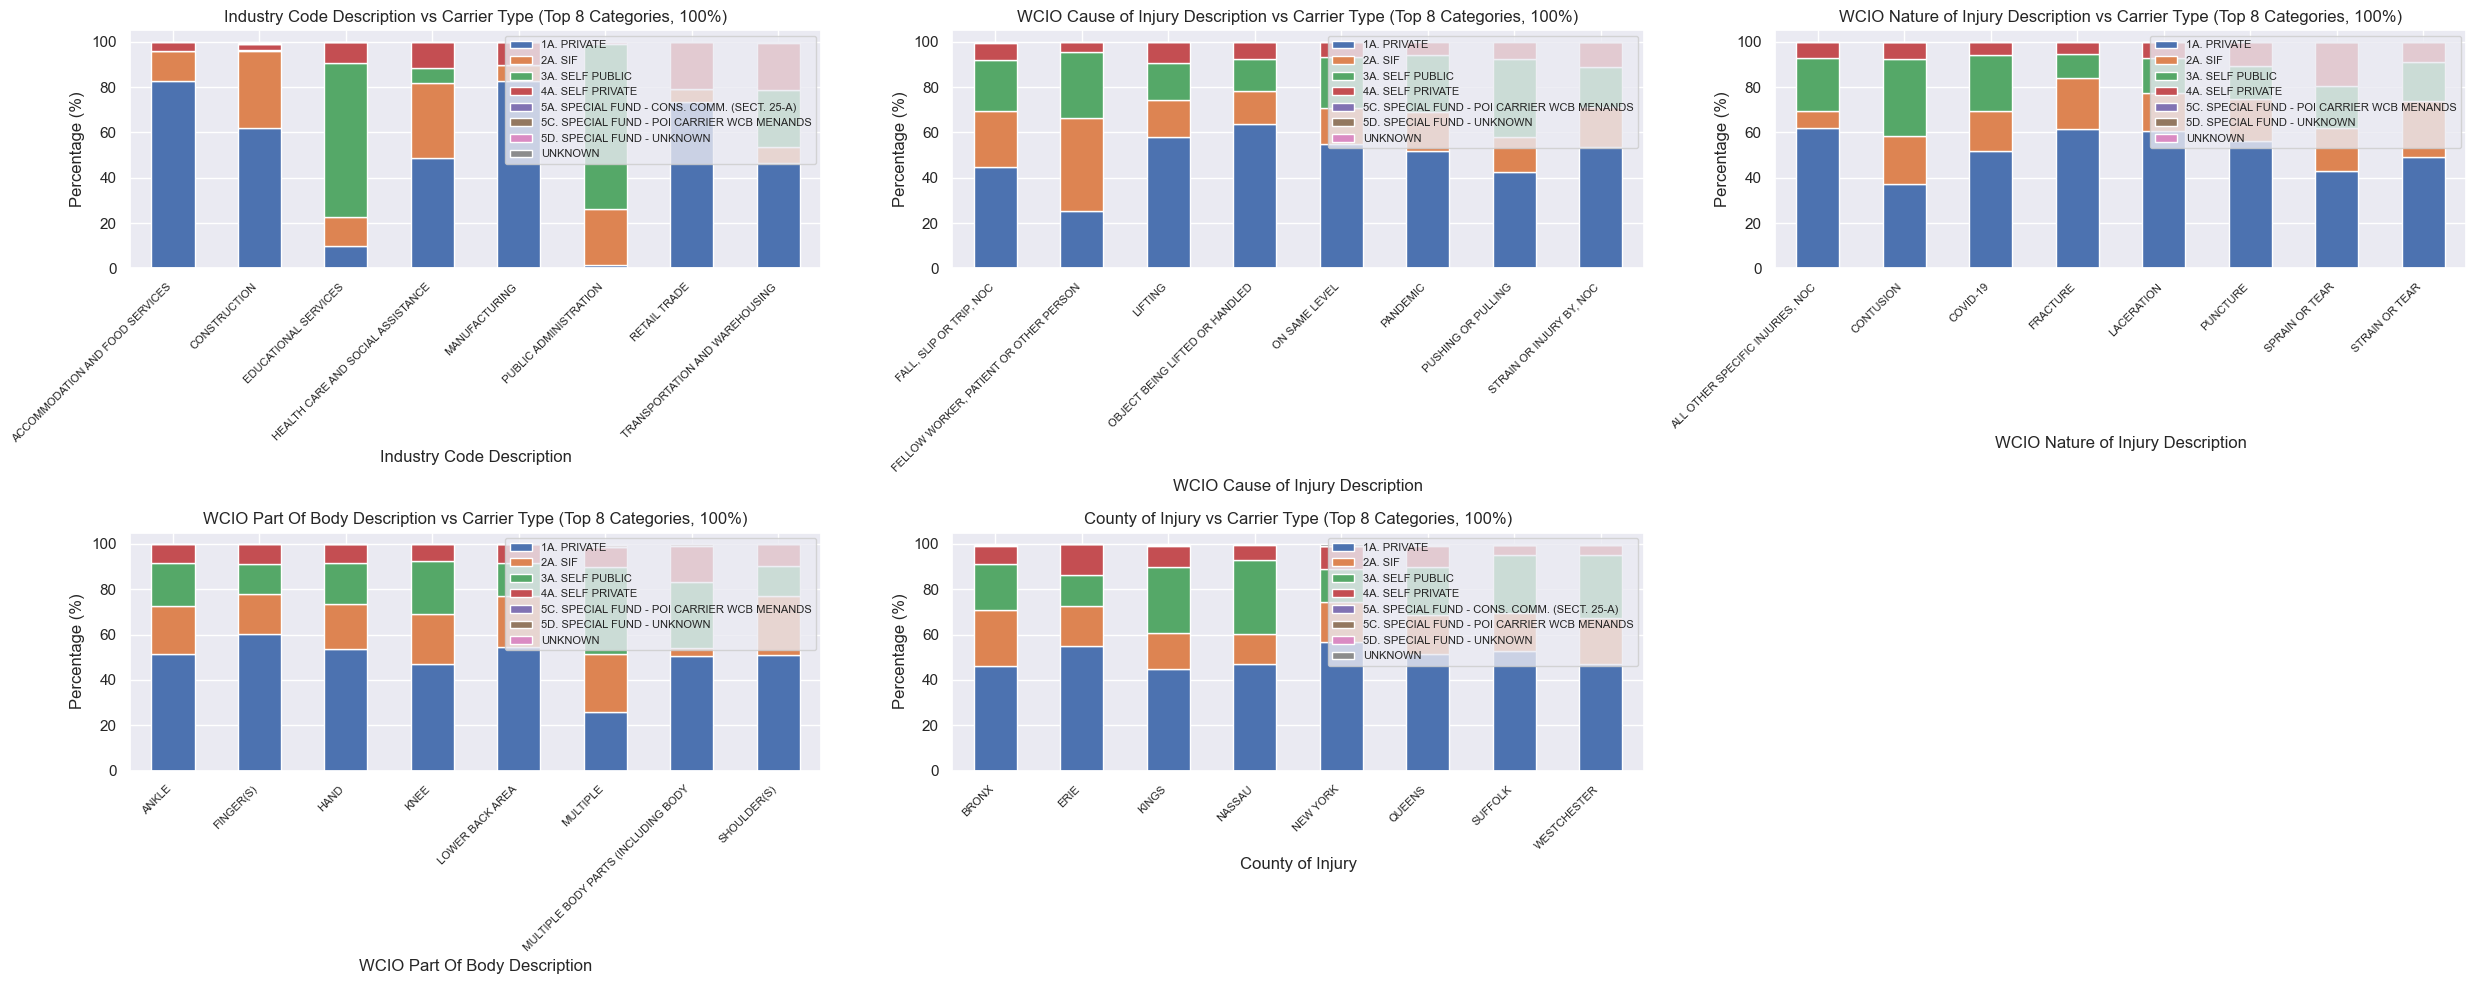

In [58]:
# High Cardinality Categorical Variables (except codes because we will use the correspondent descriptions)
categorical_features_highcar = [
    'Industry Code Description', 'WCIO Cause of Injury Description',
    'WCIO Nature of Injury Description', 'WCIO Part Of Body Description',
    'County of Injury'
]

target_var = 'Carrier Type'

# Maximum nº of categories
max_categories = 8

n_cols = 3
n_rows = (len(categorical_features_highcar) + n_cols - 1) // n_cols


fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(25, 5 * n_rows))
axes = axes.flatten()

for i, feature in enumerate(categorical_features_highcar):
    ax = axes[i]

    top_categories = train_data[feature].value_counts().nlargest(max_categories).index
    filtered_data = train_data[train_data[feature].isin(top_categories)]

    grouped_data = filtered_data.groupby([feature, target_var]).size().unstack()

    normalized_data = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

    normalized_data.plot(
        kind='bar', stacked=True, ax=ax, title=f'{feature} vs {target_var} (Top {max_categories} Categories, 100%)'
    )
    ax.set_ylabel('Percentage (%)')

    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=8)
    ax.legend(fontsize=8, loc='upper right')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Different types of "Carrier" have an impact not only on the target, but also on other variables.

We can assume this will be a useful variable for prediction (both "Claim Injury Type" and "Agreement Reached"). Given the differences between "Carrier Type"(s), one-hot encoding might be the correct approach since it will bring more predictive power to the models by selecting the most impactful values.